# Unleash the Ray - Random Search

Let's revisit our random search example but now with Ray

A lot of this code is going to be familiar as we already had our pipeline wraped in a function

In [1]:
%load_ext autoreload
%autoreload 2

from dependencies import *
from tuning import *

Loading dependencies we have already seen...
Done...


### Let's start Ray

In [3]:
ray.shutdown()
ray.init(num_cpus=6, num_gpus=0, include_webui=True)

2020-06-11 12:15:15,050	INFO resource_spec.py:204 -- Starting Ray with 34.57 GiB memory available for workers and up to 17.29 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).
2020-06-11 12:15:15,344	INFO services.py:1168 -- View the Ray dashboard at localhost:8265


{'node_ip_address': '192.168.1.39',
 'raylet_ip_address': '192.168.1.39',
 'redis_address': '192.168.1.39:50926',
 'object_store_address': '/tmp/ray/session_2020-06-11_12-15-15_049026_56145/sockets/plasma_store',
 'raylet_socket_name': '/tmp/ray/session_2020-06-11_12-15-15_049026_56145/sockets/raylet',
 'webui_url': 'localhost:8265',
 'session_dir': '/tmp/ray/session_2020-06-11_12-15-15_049026_56145'}

After initialisation the [Ray Dashboard](https://docs.ray.io/en/master/ray-dashboard.html) is available on the **webui_url** port

## Go Random Go!

So to move into a random search configuration we just need to change our search parameters to use `distributions`

In our last example:

```
ray_tuning_config = {
    'randomforestclassifier__n_estimators': tune.grid_search([1,5,15,50,100]),
    'randomforestclassifier__criterion': tune.grid_search(['gini', 'entropy']),
    'randomforestclassifier__max_features': tune.grid_search(['auto', 'sqrt', 'log2']),
    'randomforestclassifier__bootstrap': tune.grid_search([True, False]),
    'randomforestclassifier__min_samples_leaf': tune.grid_search([1,2,3,4]),
    'randomforestclassifier__min_samples_split': tune.grid_search([3,4,5,6])
}
```

Replace grid search with other tune distribution that we can sample from >> [read the docs](https://docs.ray.io/en/latest/tune/api_docs/grid_random.html?highlight=tune.grid#random-distributions-api)

Choose appropriate distriutions for the different parameter types

In [4]:
ray_tuning_config = {
    'randomforestclassifier__n_estimators': tune.randint(1, 150),
    'randomforestclassifier__criterion': tune.choice(['gini', 'entropy']),
    'randomforestclassifier__max_features': tune.choice(['auto', 'sqrt', 'log2']),
    'randomforestclassifier__bootstrap': tune.choice([True, False]),
    'randomforestclassifier__min_samples_leaf': tune.randint(1,4),
    'randomforestclassifier__min_samples_split': tune.randint(3,6)
}

There is a slight change to the run function too

In [5]:
analysis = tune.run(
                e2e_simple_training,
                config=ray_tuning_config,
    
                num_samples=100, # Specify the number of samples to make from (non grid) distributions
    
                resources_per_trial=dict(cpu=1, gpu=0))

Trial name,status,loc,randomforestclassifier__bootstrap,randomforestclassifier__criterion,randomforestclassifier__max_features,randomforestclassifier__min_samples_leaf,randomforestclassifier__min_samples_split,randomforestclassifier__n_estimators
e2e_simple_training_00001,PENDING,,0,gini,log2,3,3,134
e2e_simple_training_00002,PENDING,,0,gini,auto,1,3,20
e2e_simple_training_00003,PENDING,,1,gini,log2,1,5,65
e2e_simple_training_00004,PENDING,,1,entropy,sqrt,2,4,80
e2e_simple_training_00005,PENDING,,0,entropy,log2,2,5,41
e2e_simple_training_00006,PENDING,,1,gini,sqrt,3,3,43
e2e_simple_training_00007,PENDING,,1,gini,sqrt,1,5,37
e2e_simple_training_00008,PENDING,,1,entropy,auto,2,3,23
e2e_simple_training_00009,PENDING,,0,gini,sqrt,1,3,18
e2e_simple_training_00010,PENDING,,0,gini,auto,1,3,148


(pid=56201) Loading dependencies we have already seen...
(pid=56199) Loading dependencies we have already seen...
(pid=56200) Loading dependencies we have already seen...
(pid=56202) Loading dependencies we have already seen...
(pid=56197) Loading dependencies we have already seen...
(pid=56198) Loading dependencies we have already seen...
(pid=56201) Done...
(pid=56201) 2020-06-11 12:17:58,085	INFO trainable.py:217 -- Getting current IP.
(pid=56202) 2020-06-11 12:17:58,164	INFO trainable.py:217 -- Getting current IP.
(pid=56202) Done...
(pid=56197) 2020-06-11 12:17:58,158	INFO trainable.py:217 -- Getting current IP.
(pid=56197) Done...
(pid=56199) Done...
(pid=56199) 2020-06-11 12:17:58,175	INFO trainable.py:217 -- Getting current IP.
(pid=56200) Done...
(pid=56200) 2020-06-11 12:17:58,175	INFO trainable.py:217 -- Getting current IP.
(pid=56198) 2020-06-11 12:17:58,174	INFO trainable.py:217 -- Getting current IP.
(pid=56198) Done...


2020-06-11 12:17:58,414	INFO logger.py:269 -- Removed the following hyperparameter values when logging to tensorboard: {'randomforestclassifier__bootstrap': False}
2020-06-11 12:17:58,575	INFO logger.py:269 -- Removed the following hyperparameter values when logging to tensorboard: {'randomforestclassifier__bootstrap': False}


Result for e2e_simple_training_00002:
  date: 2020-06-11_12-17-58
  done: true
  experiment_id: 115a124da6bb45b8962dd235ee4ea191
  experiment_tag: 2_randomforestclassifier__bootstrap=False,randomforestclassifier__criterion=gini,randomforestclassifier__max_features=auto,randomforestclassifier__min_samples_leaf=1,randomforestclassifier__min_samples_split=3,randomforestclassifier__n_estimators=20
  hostname: cosmos-ml
  iterations_since_restore: 1
  mean_f1_score: 0.9720416957957033
  node_ip: 192.168.1.39
  pid: 56200
  std_f1_score: 0.01234641405566547
  time_since_restore: 0.23285460472106934
  time_this_iter_s: 0.23285460472106934
  time_total_s: 0.23285460472106934
  timestamp: 1591874278
  timesteps_since_restore: 0
  training_iteration: 0
  trial_id: '00002'
  
Result for e2e_simple_training_00005:
  date: 2020-06-11_12-17-58
  done: true
  experiment_id: 77d52d6c3ae045edb4d7693a9b8974d4
  experiment_tag: 5_randomforestclassifier__bootstrap=False,randomforestclassifier__criterion=e

2020-06-11 12:17:58,918	INFO logger.py:269 -- Removed the following hyperparameter values when logging to tensorboard: {'randomforestclassifier__bootstrap': True}
2020-06-11 12:17:59,081	INFO logger.py:269 -- Removed the following hyperparameter values when logging to tensorboard: {'randomforestclassifier__bootstrap': True}


Result for e2e_simple_training_00003:
  date: 2020-06-11_12-17-58
  done: true
  experiment_id: 81afe32899de4f229aa2abfaaf09b728
  experiment_tag: 3_randomforestclassifier__bootstrap=True,randomforestclassifier__criterion=gini,randomforestclassifier__max_features=log2,randomforestclassifier__min_samples_leaf=1,randomforestclassifier__min_samples_split=5,randomforestclassifier__n_estimators=65
  hostname: cosmos-ml
  iterations_since_restore: 1
  mean_f1_score: 0.9693802400731892
  node_ip: 192.168.1.39
  pid: 56202
  std_f1_score: 0.015769622456041518
  time_since_restore: 0.7465651035308838
  time_this_iter_s: 0.7465651035308838
  time_total_s: 0.7465651035308838
  timestamp: 1591874278
  timesteps_since_restore: 0
  training_iteration: 0
  trial_id: '00003'
  
Result for e2e_simple_training_00004:
  date: 2020-06-11_12-17-59
  done: true
  experiment_id: 423eb07bfc524c5b8117bb5521d5f8ec
  experiment_tag: 4_randomforestclassifier__bootstrap=True,randomforestclassifier__criterion=entro

2020-06-11 12:17:59,174	INFO logger.py:269 -- Removed the following hyperparameter values when logging to tensorboard: {'randomforestclassifier__bootstrap': True}


Result for e2e_simple_training_00000:
  date: 2020-06-11_12-17-59
  done: true
  experiment_id: 8e1dae1d028944b3b2f45a8b2df3d3b3
  experiment_tag: 0_randomforestclassifier__bootstrap=True,randomforestclassifier__criterion=entropy,randomforestclassifier__max_features=sqrt,randomforestclassifier__min_samples_leaf=2,randomforestclassifier__min_samples_split=3,randomforestclassifier__n_estimators=99
  hostname: cosmos-ml
  iterations_since_restore: 1
  mean_f1_score: 0.9718830252652703
  node_ip: 192.168.1.39
  pid: 56201
  std_f1_score: 0.016918646091308834
  time_since_restore: 1.0731208324432373
  time_this_iter_s: 1.0731208324432373
  time_total_s: 1.0731208324432373
  timestamp: 1591874279
  timesteps_since_restore: 0
  training_iteration: 0
  trial_id: '00000'
  
(pid=56430) Loading dependencies we have already seen...
(pid=56431) Loading dependencies we have already seen...


2020-06-11 12:17:59,578	INFO logger.py:269 -- Removed the following hyperparameter values when logging to tensorboard: {'randomforestclassifier__bootstrap': False}


(pid=56433) Loading dependencies we have already seen...
(pid=56445) Loading dependencies we have already seen...
Result for e2e_simple_training_00001:
  date: 2020-06-11_12-17-59
  done: true
  experiment_id: 6e168e16b88043f5ae7847154da8a4cd
  experiment_tag: 1_randomforestclassifier__bootstrap=False,randomforestclassifier__criterion=gini,randomforestclassifier__max_features=log2,randomforestclassifier__min_samples_leaf=3,randomforestclassifier__min_samples_split=3,randomforestclassifier__n_estimators=134
  hostname: cosmos-ml
  iterations_since_restore: 1
  mean_f1_score: 0.9721351906156419
  node_ip: 192.168.1.39
  pid: 56197
  std_f1_score: 0.01472939203711315
  time_since_restore: 1.4125020503997803
  time_this_iter_s: 1.4125020503997803
  time_total_s: 1.4125020503997803
  timestamp: 1591874279
  timesteps_since_restore: 0
  training_iteration: 0
  trial_id: '00001'
  
(pid=56460) Loading dependencies we have already seen...
(pid=56428) 2020-06-11 12:17:59,910	INFO trainable.py:2

2020-06-11 12:18:00,346	INFO logger.py:269 -- Removed the following hyperparameter values when logging to tensorboard: {'randomforestclassifier__bootstrap': True}
2020-06-11 12:18:00,370	INFO logger.py:269 -- Removed the following hyperparameter values when logging to tensorboard: {'randomforestclassifier__bootstrap': True}
2020-06-11 12:18:00,395	INFO logger.py:269 -- Removed the following hyperparameter values when logging to tensorboard: {'randomforestclassifier__bootstrap': False}


(pid=56445) Done...
(pid=56445) 2020-06-11 12:18:00,235	INFO trainable.py:217 -- Getting current IP.
Result for e2e_simple_training_00006:
  date: 2020-06-11_12-18-00
  done: true
  experiment_id: 476bbefb328b4dce9828d3cd8aee0f0b
  experiment_tag: 6_randomforestclassifier__bootstrap=True,randomforestclassifier__criterion=gini,randomforestclassifier__max_features=sqrt,randomforestclassifier__min_samples_leaf=3,randomforestclassifier__min_samples_split=3,randomforestclassifier__n_estimators=43
  hostname: cosmos-ml
  iterations_since_restore: 1
  mean_f1_score: 0.970721364701985
  node_ip: 192.168.1.39
  pid: 56428
  std_f1_score: 0.01735690471548167
  time_since_restore: 0.39849328994750977
  time_this_iter_s: 0.39849328994750977
  time_total_s: 0.39849328994750977
  timestamp: 1591874280
  timesteps_since_restore: 0
  training_iteration: 0
  trial_id: '00006'
  
Result for e2e_simple_training_00008:
  date: 2020-06-11_12-18-00
  done: true
  experiment_id: fa10ef81b3e0414daed78c3c47f6c

2020-06-11 12:18:00,509	INFO logger.py:269 -- Removed the following hyperparameter values when logging to tensorboard: {'randomforestclassifier__bootstrap': True}


Result for e2e_simple_training_00007:
  date: 2020-06-11_12-18-00
  done: true
  experiment_id: 518a36ed97aa4572981d9227095b37a3
  experiment_tag: 7_randomforestclassifier__bootstrap=True,randomforestclassifier__criterion=gini,randomforestclassifier__max_features=sqrt,randomforestclassifier__min_samples_leaf=1,randomforestclassifier__min_samples_split=5,randomforestclassifier__n_estimators=37
  hostname: cosmos-ml
  iterations_since_restore: 1
  mean_f1_score: 0.9735969368373715
  node_ip: 192.168.1.39
  pid: 56430
  std_f1_score: 0.0160032139949415
  time_since_restore: 0.4229435920715332
  time_this_iter_s: 0.4229435920715332
  time_total_s: 0.4229435920715332
  timestamp: 1591874280
  timesteps_since_restore: 0
  training_iteration: 0
  trial_id: '00007'
  
(pid=56460) Done...
(pid=56460) 2020-06-11 12:18:00,503	INFO trainable.py:217 -- Getting current IP.
(pid=56494) Loading dependencies we have already seen...
(pid=56448) Loading dependencies we have already seen...
(pid=56450) Lo

2020-06-11 12:18:01,409	INFO logger.py:269 -- Removed the following hyperparameter values when logging to tensorboard: {'randomforestclassifier__bootstrap': False}
2020-06-11 12:18:01,429	INFO logger.py:269 -- Removed the following hyperparameter values when logging to tensorboard: {'randomforestclassifier__bootstrap': False}


(pid=56494) 2020-06-11 12:18:01,341	INFO trainable.py:217 -- Getting current IP.
(pid=56494) Done...
Result for e2e_simple_training_00012:
  date: 2020-06-11_12-18-01
  done: true
  experiment_id: 44344afd0b734f4498a65bc28bfedee0
  experiment_tag: 12_randomforestclassifier__bootstrap=False,randomforestclassifier__criterion=gini,randomforestclassifier__max_features=log2,randomforestclassifier__min_samples_leaf=1,randomforestclassifier__min_samples_split=4,randomforestclassifier__n_estimators=2
  hostname: cosmos-ml
  iterations_since_restore: 1
  mean_f1_score: 0.9449955301269444
  node_ip: 192.168.1.39
  pid: 56494
  std_f1_score: 0.020245296824453755
  time_since_restore: 0.05977916717529297
  time_this_iter_s: 0.05977916717529297
  time_total_s: 0.05977916717529297
  timestamp: 1591874281
  timesteps_since_restore: 0
  training_iteration: 0
  trial_id: '00012'
  
(pid=56448) 2020-06-11 12:18:01,365	INFO trainable.py:217 -- Getting current IP.
(pid=56448) Done...
Result for e2e_simple

2020-06-11 12:18:01,875	INFO logger.py:269 -- Removed the following hyperparameter values when logging to tensorboard: {'randomforestclassifier__bootstrap': False}


Result for e2e_simple_training_00010:
  date: 2020-06-11_12-18-01
  done: true
  experiment_id: 68786b9e8de64b01afa760b685737669
  experiment_tag: 10_randomforestclassifier__bootstrap=False,randomforestclassifier__criterion=gini,randomforestclassifier__max_features=auto,randomforestclassifier__min_samples_leaf=1,randomforestclassifier__min_samples_split=3,randomforestclassifier__n_estimators=148
  hostname: cosmos-ml
  iterations_since_restore: 1
  mean_f1_score: 0.9720789209495126
  node_ip: 192.168.1.39
  pid: 56445
  std_f1_score: 0.014757038428669506
  time_since_restore: 1.6314005851745605
  time_this_iter_s: 1.6314005851745605
  time_total_s: 1.6314005851745605
  timestamp: 1591874281
  timesteps_since_restore: 0
  training_iteration: 0
  trial_id: '00010'
  
(pid=56551) Done...
(pid=56551) 2020-06-11 12:18:02,014	INFO trainable.py:217 -- Getting current IP.
(pid=56569) Loading dependencies we have already seen...
(pid=56567) Loading dependencies we have already seen...
(pid=5657

2020-06-11 12:18:02,468	INFO logger.py:269 -- Removed the following hyperparameter values when logging to tensorboard: {'randomforestclassifier__bootstrap': True}


Result for e2e_simple_training_00013:
  date: 2020-06-11_12-18-02
  done: true
  experiment_id: a72f33722ea8436c91458b4a9245588f
  experiment_tag: 13_randomforestclassifier__bootstrap=True,randomforestclassifier__criterion=gini,randomforestclassifier__max_features=auto,randomforestclassifier__min_samples_leaf=2,randomforestclassifier__min_samples_split=4,randomforestclassifier__n_estimators=90
  hostname: cosmos-ml
  iterations_since_restore: 1
  mean_f1_score: 0.968037556881191
  node_ip: 192.168.1.39
  pid: 56448
  std_f1_score: 0.01677626213258541
  time_since_restore: 1.065340280532837
  time_this_iter_s: 1.065340280532837
  time_total_s: 1.065340280532837
  timestamp: 1591874282
  timesteps_since_restore: 0
  training_iteration: 0
  trial_id: '00013'
  


Trial name,status,loc,randomforestclassifier__bootstrap,randomforestclassifier__criterion,randomforestclassifier__max_features,randomforestclassifier__min_samples_leaf,randomforestclassifier__min_samples_split,randomforestclassifier__n_estimators,iter,total time (s)
e2e_simple_training_00019,PENDING,,0,entropy,sqrt,1,3,90,,
e2e_simple_training_00020,PENDING,,0,entropy,log2,2,3,99,,
e2e_simple_training_00021,PENDING,,0,entropy,sqrt,3,4,142,,
e2e_simple_training_00022,PENDING,,0,entropy,auto,1,5,71,,
e2e_simple_training_00023,PENDING,,1,gini,auto,2,3,52,,
e2e_simple_training_00024,PENDING,,0,entropy,auto,1,3,117,,
e2e_simple_training_00025,PENDING,,0,gini,auto,1,4,11,,
e2e_simple_training_00026,PENDING,,0,gini,sqrt,3,3,29,,
e2e_simple_training_00014,RUNNING,,1,entropy,auto,3,3,82,,
e2e_simple_training_00015,RUNNING,,0,gini,log2,3,5,102,,


2020-06-11 12:18:02,505	INFO logger.py:269 -- Removed the following hyperparameter values when logging to tensorboard: {'randomforestclassifier__bootstrap': True}


Result for e2e_simple_training_00014:
  date: 2020-06-11_12-18-02
  done: true
  experiment_id: 776c49edcdc945f78413081675a65d31
  experiment_tag: 14_randomforestclassifier__bootstrap=True,randomforestclassifier__criterion=entropy,randomforestclassifier__max_features=auto,randomforestclassifier__min_samples_leaf=3,randomforestclassifier__min_samples_split=3,randomforestclassifier__n_estimators=82
  hostname: cosmos-ml
  iterations_since_restore: 1
  mean_f1_score: 0.9750538132942479
  node_ip: 192.168.1.39
  pid: 56450
  std_f1_score: 0.014102962629179218
  time_since_restore: 1.0058209896087646
  time_this_iter_s: 1.0058209896087646
  time_total_s: 1.0058209896087646
  timestamp: 1591874282
  timesteps_since_restore: 0
  training_iteration: 0
  trial_id: '00014'
  
(pid=56604) Loading dependencies we have already seen...
(pid=56574) Loading dependencies we have already seen...
(pid=56569) Done...
(pid=56569) 2020-06-11 12:18:02,849	INFO trainable.py:217 -- Getting current IP.
(pid=565

2020-06-11 12:18:03,078	INFO logger.py:269 -- Removed the following hyperparameter values when logging to tensorboard: {'randomforestclassifier__bootstrap': False}


(pid=56567) Done...
(pid=56567) 2020-06-11 12:18:02,935	INFO trainable.py:217 -- Getting current IP.
Result for e2e_simple_training_00015:
  date: 2020-06-11_12-18-03
  done: true
  experiment_id: 8eecc13a54e04667a4163a253afa5cb4
  experiment_tag: 15_randomforestclassifier__bootstrap=False,randomforestclassifier__criterion=gini,randomforestclassifier__max_features=log2,randomforestclassifier__min_samples_leaf=3,randomforestclassifier__min_samples_split=5,randomforestclassifier__n_estimators=102
  hostname: cosmos-ml
  iterations_since_restore: 1
  mean_f1_score: 0.9664118206086456
  node_ip: 192.168.1.39
  pid: 56551
  std_f1_score: 0.019396712095072675
  time_since_restore: 1.0109822750091553
  time_this_iter_s: 1.0109822750091553
  time_total_s: 1.0109822750091553
  timestamp: 1591874283
  timesteps_since_restore: 0
  training_iteration: 0
  trial_id: '00015'
  


2020-06-11 12:18:03,311	INFO logger.py:269 -- Removed the following hyperparameter values when logging to tensorboard: {'randomforestclassifier__bootstrap': False}
2020-06-11 12:18:03,426	INFO logger.py:269 -- Removed the following hyperparameter values when logging to tensorboard: {'randomforestclassifier__bootstrap': True}


Result for e2e_simple_training_00017:
  date: 2020-06-11_12-18-03
  done: true
  experiment_id: 1743a4a589f9447ebd1e3a9b3eb4e736
  experiment_tag: 17_randomforestclassifier__bootstrap=False,randomforestclassifier__criterion=gini,randomforestclassifier__max_features=sqrt,randomforestclassifier__min_samples_leaf=3,randomforestclassifier__min_samples_split=4,randomforestclassifier__n_estimators=32
  hostname: cosmos-ml
  iterations_since_restore: 1
  mean_f1_score: 0.9680345634804975
  node_ip: 192.168.1.39
  pid: 56567
  std_f1_score: 0.014279337684904808
  time_since_restore: 0.33533740043640137
  time_this_iter_s: 0.33533740043640137
  time_total_s: 0.33533740043640137
  timestamp: 1591874283
  timesteps_since_restore: 0
  training_iteration: 0
  trial_id: '00017'
  
(pid=56570) Loading dependencies we have already seen...
Result for e2e_simple_training_00016:
  date: 2020-06-11_12-18-03
  done: true
  experiment_id: 18ffb3e52e3a45d7961656f71cebfa8f
  experiment_tag: 16_randomforestcla

2020-06-11 12:18:03,608	INFO logger.py:269 -- Removed the following hyperparameter values when logging to tensorboard: {'randomforestclassifier__bootstrap': False}


(pid=56574) Done...
(pid=56574) 2020-06-11 12:18:03,506	INFO trainable.py:217 -- Getting current IP.
Result for e2e_simple_training_00018:
  date: 2020-06-11_12-18-03
  done: true
  experiment_id: c01f6d6cfc7c4119a8cab0c85636375f
  experiment_tag: 18_randomforestclassifier__bootstrap=False,randomforestclassifier__criterion=entropy,randomforestclassifier__max_features=auto,randomforestclassifier__min_samples_leaf=1,randomforestclassifier__min_samples_split=4,randomforestclassifier__n_estimators=52
  hostname: cosmos-ml
  iterations_since_restore: 1
  mean_f1_score: 0.9763549158791855
  node_ip: 192.168.1.39
  pid: 56572
  std_f1_score: 0.007059629878368909
  time_since_restore: 0.6807734966278076
  time_this_iter_s: 0.6807734966278076
  time_total_s: 0.6807734966278076
  timestamp: 1591874283
  timesteps_since_restore: 0
  training_iteration: 0
  trial_id: 00018
  
(pid=56589) Loading dependencies we have already seen...
(pid=56604) Done...
(pid=56604) 2020-06-11 12:18:03,654	INFO train

2020-06-11 12:18:04,559	INFO logger.py:269 -- Removed the following hyperparameter values when logging to tensorboard: {'randomforestclassifier__bootstrap': False}
2020-06-11 12:18:04,666	INFO logger.py:269 -- Removed the following hyperparameter values when logging to tensorboard: {'randomforestclassifier__bootstrap': False}


Result for e2e_simple_training_00020:
  date: 2020-06-11_12-18-04
  done: true
  experiment_id: b4c37dd0629b4bd3894758dcf669373a
  experiment_tag: 20_randomforestclassifier__bootstrap=False,randomforestclassifier__criterion=entropy,randomforestclassifier__max_features=log2,randomforestclassifier__min_samples_leaf=2,randomforestclassifier__min_samples_split=3,randomforestclassifier__n_estimators=99
  hostname: cosmos-ml
  iterations_since_restore: 1
  mean_f1_score: 0.9694730316417889
  node_ip: 192.168.1.39
  pid: 56574
  std_f1_score: 0.018439939964933934
  time_since_restore: 1.0103135108947754
  time_this_iter_s: 1.0103135108947754
  time_total_s: 1.0103135108947754
  timestamp: 1591874284
  timesteps_since_restore: 0
  training_iteration: 0
  trial_id: '00020'
  
Result for e2e_simple_training_00019:
  date: 2020-06-11_12-18-04
  done: true
  experiment_id: 2496d5f0f67148fe95d20277682fb551
  experiment_tag: 19_randomforestclassifier__bootstrap=False,randomforestclassifier__criterio

2020-06-11 12:18:05,048	INFO logger.py:269 -- Removed the following hyperparameter values when logging to tensorboard: {'randomforestclassifier__bootstrap': True}
2020-06-11 12:18:05,113	INFO logger.py:269 -- Removed the following hyperparameter values when logging to tensorboard: {'randomforestclassifier__bootstrap': False}


(pid=56677) Loading dependencies we have already seen...
(pid=56678) 2020-06-11 12:18:04,999	INFO trainable.py:217 -- Getting current IP.
(pid=56678) Done...
Result for e2e_simple_training_00023:
  date: 2020-06-11_12-18-05
  done: true
  experiment_id: 27bac5b482eb4a3aac2e000e1001dcec
  experiment_tag: 23_randomforestclassifier__bootstrap=True,randomforestclassifier__criterion=gini,randomforestclassifier__max_features=auto,randomforestclassifier__min_samples_leaf=2,randomforestclassifier__min_samples_split=3,randomforestclassifier__n_estimators=52
  hostname: cosmos-ml
  iterations_since_restore: 1
  mean_f1_score: 0.9666590732132256
  node_ip: 192.168.1.39
  pid: 56573
  std_f1_score: 0.016111589240835205
  time_since_restore: 0.5823013782501221
  time_this_iter_s: 0.5823013782501221
  time_total_s: 0.5823013782501221
  timestamp: 1591874285
  timesteps_since_restore: 0
  training_iteration: 0
  trial_id: '00023'
  
Result for e2e_simple_training_00022:
  date: 2020-06-11_12-18-05
  

2020-06-11 12:18:05,692	INFO logger.py:269 -- Removed the following hyperparameter values when logging to tensorboard: {'randomforestclassifier__bootstrap': False}


(pid=56709) Loading dependencies we have already seen...
Result for e2e_simple_training_00021:
  date: 2020-06-11_12-18-05
  done: true
  experiment_id: 32d6fe73434f4e05b9a22a88c8686c34
  experiment_tag: 21_randomforestclassifier__bootstrap=False,randomforestclassifier__criterion=entropy,randomforestclassifier__max_features=sqrt,randomforestclassifier__min_samples_leaf=3,randomforestclassifier__min_samples_split=4,randomforestclassifier__n_estimators=142
  hostname: cosmos-ml
  iterations_since_restore: 1
  mean_f1_score: 0.9750522617242025
  node_ip: 192.168.1.39
  pid: 56570
  std_f1_score: 0.011979703289626107
  time_since_restore: 1.5617926120758057
  time_this_iter_s: 1.5617926120758057
  time_total_s: 1.5617926120758057
  timestamp: 1591874285
  timesteps_since_restore: 0
  training_iteration: 0
  trial_id: '00021'
  
(pid=56724) Loading dependencies we have already seen...


2020-06-11 12:18:06,000	INFO logger.py:269 -- Removed the following hyperparameter values when logging to tensorboard: {'randomforestclassifier__bootstrap': False}


(pid=56677) Done...
(pid=56677) 2020-06-11 12:18:05,798	INFO trainable.py:217 -- Getting current IP.
Result for e2e_simple_training_00025:
  date: 2020-06-11_12-18-05
  done: true
  experiment_id: a3acb4c4e3bf4b71a29d9fbb11d8605d
  experiment_tag: 25_randomforestclassifier__bootstrap=False,randomforestclassifier__criterion=gini,randomforestclassifier__max_features=auto,randomforestclassifier__min_samples_leaf=1,randomforestclassifier__min_samples_split=4,randomforestclassifier__n_estimators=11
  hostname: cosmos-ml
  iterations_since_restore: 1
  mean_f1_score: 0.9636788266850816
  node_ip: 192.168.1.39
  pid: 56677
  std_f1_score: 0.010411583387186542
  time_since_restore: 0.1603705883026123
  time_this_iter_s: 0.1603705883026123
  time_total_s: 0.1603705883026123
  timestamp: 1591874285
  timesteps_since_restore: 0
  training_iteration: 0
  trial_id: '00025'
  
(pid=56727) Loading dependencies we have already seen...
(pid=56707) 2020-06-11 12:18:06,076	INFO trainable.py:217 -- Gettin

2020-06-11 12:18:06,421	INFO logger.py:269 -- Removed the following hyperparameter values when logging to tensorboard: {'randomforestclassifier__bootstrap': False}
2020-06-11 12:18:06,506	INFO logger.py:269 -- Removed the following hyperparameter values when logging to tensorboard: {'randomforestclassifier__bootstrap': False}


(pid=56740) Loading dependencies we have already seen...
Result for e2e_simple_training_00024:
  date: 2020-06-11_12-18-06
  done: true
  experiment_id: 52efeba86ed540cf971a11fe3f2eab78
  experiment_tag: 24_randomforestclassifier__bootstrap=False,randomforestclassifier__criterion=entropy,randomforestclassifier__max_features=auto,randomforestclassifier__min_samples_leaf=1,randomforestclassifier__min_samples_split=3,randomforestclassifier__n_estimators=117
  hostname: cosmos-ml
  iterations_since_restore: 1
  mean_f1_score: 0.9804741751758191
  node_ip: 192.168.1.39
  pid: 56678
  std_f1_score: 0.010167606093374923
  time_since_restore: 1.365588665008545
  time_this_iter_s: 1.365588665008545
  time_total_s: 1.365588665008545
  timestamp: 1591874286
  timesteps_since_restore: 0
  training_iteration: 0
  trial_id: '00024'
  
(pid=56709) 2020-06-11 12:18:06,379	INFO trainable.py:217 -- Getting current IP.
(pid=56709) Done...
Result for e2e_simple_training_00026:
  date: 2020-06-11_12-18-06


2020-06-11 12:18:06,792	INFO logger.py:269 -- Removed the following hyperparameter values when logging to tensorboard: {'randomforestclassifier__bootstrap': True}


Result for e2e_simple_training_00028:
  date: 2020-06-11_12-18-06
  done: true
  experiment_id: 2fd5d2549d9644f49e92640d0e8cb91f
  experiment_tag: 28_randomforestclassifier__bootstrap=True,randomforestclassifier__criterion=entropy,randomforestclassifier__max_features=sqrt,randomforestclassifier__min_samples_leaf=1,randomforestclassifier__min_samples_split=5,randomforestclassifier__n_estimators=16
  hostname: cosmos-ml
  iterations_since_restore: 1
  mean_f1_score: 0.9680616561879578
  node_ip: 192.168.1.39
  pid: 56724
  std_f1_score: 0.014256538978213303
  time_since_restore: 0.20792055130004883
  time_this_iter_s: 0.20792055130004883
  time_total_s: 0.20792055130004883
  timestamp: 1591874286
  timesteps_since_restore: 0
  training_iteration: 0
  trial_id: 00028
  (pid=56721) Loading dependencies we have already seen...

(pid=56723) Loading dependencies we have already seen...
(pid=56727) Done...
(pid=56727) 2020-06-11 12:18:06,828	INFO trainable.py:217 -- Getting current IP.


2020-06-11 12:18:07,244	INFO logger.py:269 -- Removed the following hyperparameter values when logging to tensorboard: {'randomforestclassifier__bootstrap': False}


(pid=56740) 2020-06-11 12:18:07,040	INFO trainable.py:217 -- Getting current IP.
(pid=56740) Done...
Result for e2e_simple_training_00029:
  date: 2020-06-11_12-18-07
  done: true
  experiment_id: f1b59fca45b140a89920b71720c0d20c
  experiment_tag: 29_randomforestclassifier__bootstrap=False,randomforestclassifier__criterion=entropy,randomforestclassifier__max_features=log2,randomforestclassifier__min_samples_leaf=2,randomforestclassifier__min_samples_split=4,randomforestclassifier__n_estimators=29
  hostname: cosmos-ml
  iterations_since_restore: 1
  mean_f1_score: 0.9721355979265077
  node_ip: 192.168.1.39
  pid: 56727
  std_f1_score: 0.013219905801425628
  time_since_restore: 0.36600518226623535
  time_this_iter_s: 0.36600518226623535
  time_total_s: 0.36600518226623535
  timestamp: 1591874287
  timesteps_since_restore: 0
  training_iteration: 0
  trial_id: 00029
  


2020-06-11 12:18:07,625	INFO logger.py:269 -- Removed the following hyperparameter values when logging to tensorboard: {'randomforestclassifier__bootstrap': False}


(pid=56803) Loading dependencies we have already seen...
(pid=56723) 2020-06-11 12:18:07,461	INFO trainable.py:217 -- Getting current IP.
(pid=56723) Done...
(pid=56721) 2020-06-11 12:18:07,505	INFO trainable.py:217 -- Getting current IP.
(pid=56721) Done...
(pid=56804) Loading dependencies we have already seen...
Result for e2e_simple_training_00030:
  date: 2020-06-11_12-18-07
  done: true
  experiment_id: a12ffdf9ea1d46eeae4a34e0b437793e
  experiment_tag: 30_randomforestclassifier__bootstrap=False,randomforestclassifier__criterion=entropy,randomforestclassifier__max_features=log2,randomforestclassifier__min_samples_leaf=2,randomforestclassifier__min_samples_split=3,randomforestclassifier__n_estimators=55
  hostname: cosmos-ml
  iterations_since_restore: 1
  mean_f1_score: 0.9693585306558834
  node_ip: 192.168.1.39
  pid: 56740
  std_f1_score: 0.013129557974705854
  time_since_restore: 0.5489528179168701
  time_this_iter_s: 0.5489528179168701
  time_total_s: 0.5489528179168701
  time

Trial name,status,loc,randomforestclassifier__bootstrap,randomforestclassifier__criterion,randomforestclassifier__max_features,randomforestclassifier__min_samples_leaf,randomforestclassifier__min_samples_split,randomforestclassifier__n_estimators,iter,total time (s)
e2e_simple_training_00035,PENDING,,0,entropy,sqrt,1,3,117,,
e2e_simple_training_00036,PENDING,,1,gini,log2,1,3,13,,
e2e_simple_training_00037,PENDING,,1,entropy,auto,2,5,129,,
e2e_simple_training_00038,PENDING,,1,entropy,log2,2,5,115,,
e2e_simple_training_00039,PENDING,,0,gini,log2,3,3,91,,
e2e_simple_training_00040,PENDING,,0,gini,sqrt,3,5,27,,
e2e_simple_training_00041,PENDING,,0,entropy,sqrt,3,4,146,,
e2e_simple_training_00042,PENDING,,1,entropy,log2,2,4,62,,
e2e_simple_training_00027,RUNNING,,1,gini,log2,2,5,133,,
e2e_simple_training_00031,RUNNING,,0,entropy,sqrt,1,5,27,,


2020-06-11 12:18:07,664	INFO logger.py:269 -- Removed the following hyperparameter values when logging to tensorboard: {'randomforestclassifier__bootstrap': True}
2020-06-11 12:18:07,842	INFO logger.py:269 -- Removed the following hyperparameter values when logging to tensorboard: {'randomforestclassifier__bootstrap': False}


Result for e2e_simple_training_00027:
  date: 2020-06-11_12-18-07
  done: true
  experiment_id: 3bb4a684de8043d486cf2172055ebba0
  experiment_tag: 27_randomforestclassifier__bootstrap=True,randomforestclassifier__criterion=gini,randomforestclassifier__max_features=log2,randomforestclassifier__min_samples_leaf=2,randomforestclassifier__min_samples_split=5,randomforestclassifier__n_estimators=133
  hostname: cosmos-ml
  iterations_since_restore: 1
  mean_f1_score: 0.9666590732132256
  node_ip: 192.168.1.39
  pid: 56709
  std_f1_score: 0.016111589240835205
  time_since_restore: 1.233144998550415
  time_this_iter_s: 1.233144998550415
  time_total_s: 1.233144998550415
  timestamp: 1591874287
  timesteps_since_restore: 0
  training_iteration: 0
  trial_id: '00027'
  
Result for e2e_simple_training_00031:
  date: 2020-06-11_12-18-07
  done: true
  experiment_id: 781478e6c8f04a0a88c6c14d072cf496
  experiment_tag: 31_randomforestclassifier__bootstrap=False,randomforestclassifier__criterion=entr

2020-06-11 12:18:08,391	INFO logger.py:269 -- Removed the following hyperparameter values when logging to tensorboard: {'randomforestclassifier__bootstrap': True}
2020-06-11 12:18:08,527	INFO logger.py:269 -- Removed the following hyperparameter values when logging to tensorboard: {'randomforestclassifier__bootstrap': True}


Result for e2e_simple_training_00032:
  date: 2020-06-11_12-18-08
  done: true
  experiment_id: a5fa3fb05e5440449bf9d40f5dc44ea0
  experiment_tag: 32_randomforestclassifier__bootstrap=True,randomforestclassifier__criterion=gini,randomforestclassifier__max_features=log2,randomforestclassifier__min_samples_leaf=3,randomforestclassifier__min_samples_split=3,randomforestclassifier__n_estimators=79
  hostname: cosmos-ml
  iterations_since_restore: 1
  mean_f1_score: 0.9651637878698727
  node_ip: 192.168.1.39
  pid: 56721
  std_f1_score: 0.014114038202165334
  time_since_restore: 0.8434507846832275
  time_this_iter_s: 0.8434507846832275
  time_total_s: 0.8434507846832275
  timestamp: 1591874288
  timesteps_since_restore: 0
  training_iteration: 0
  trial_id: '00032'
  
(pid=56846) Loading dependencies we have already seen...
Result for e2e_simple_training_00033:
  date: 2020-06-11_12-18-08
  done: true
  experiment_id: d248a31cbd0f49e1b103336a374170a7
  experiment_tag: 33_randomforestclassif

2020-06-11 12:18:09,351	INFO logger.py:269 -- Removed the following hyperparameter values when logging to tensorboard: {'randomforestclassifier__bootstrap': True}


(pid=56846) 2020-06-11 12:18:09,171	INFO trainable.py:217 -- Getting current IP.
(pid=56846) Done...
(pid=56849) 2020-06-11 12:18:09,280	INFO trainable.py:217 -- Getting current IP.
(pid=56849) Done...
Result for e2e_simple_training_00036:
  date: 2020-06-11_12-18-09
  done: true
  experiment_id: 416e8e4675ef432e9fa6384491184d4c
  experiment_tag: 36_randomforestclassifier__bootstrap=True,randomforestclassifier__criterion=gini,randomforestclassifier__max_features=log2,randomforestclassifier__min_samples_leaf=1,randomforestclassifier__min_samples_split=3,randomforestclassifier__n_estimators=13
  hostname: cosmos-ml
  iterations_since_restore: 1
  mean_f1_score: 0.9636992452801099
  node_ip: 192.168.1.39
  pid: 56846
  std_f1_score: 0.021731202275011987
  time_since_restore: 0.15147972106933594
  time_this_iter_s: 0.15147972106933594
  time_total_s: 0.15147972106933594
  timestamp: 1591874289
  timesteps_since_restore: 0
  training_iteration: 0
  trial_id: '00036'
  


2020-06-11 12:18:09,619	INFO logger.py:269 -- Removed the following hyperparameter values when logging to tensorboard: {'randomforestclassifier__bootstrap': True}


(pid=56851) 2020-06-11 12:18:09,377	INFO trainable.py:217 -- Getting current IP.
(pid=56851) Done...
(pid=56862) 2020-06-11 12:18:09,438	INFO trainable.py:217 -- Getting current IP.
(pid=56862) Done...
Result for e2e_simple_training_00034:
  date: 2020-06-11_12-18-09
  done: true
  experiment_id: f23143670b604d668a45db2b146b1218
  experiment_tag: 34_randomforestclassifier__bootstrap=True,randomforestclassifier__criterion=gini,randomforestclassifier__max_features=sqrt,randomforestclassifier__min_samples_leaf=2,randomforestclassifier__min_samples_split=5,randomforestclassifier__n_estimators=119
  hostname: cosmos-ml
  iterations_since_restore: 1
  mean_f1_score: 0.969316557739155
  node_ip: 192.168.1.39
  pid: 56804
  std_f1_score: 0.021519725371044594
  time_since_restore: 1.0962443351745605
  time_this_iter_s: 1.0962443351745605
  time_total_s: 1.0962443351745605
  timestamp: 1591874289
  timesteps_since_restore: 0
  training_iteration: 0
  trial_id: '00034'
  
(pid=56865) Loading depe

2020-06-11 12:18:10,130	INFO logger.py:269 -- Removed the following hyperparameter values when logging to tensorboard: {'randomforestclassifier__bootstrap': False}


(pid=56848) Loading dependencies we have already seen...
Result for e2e_simple_training_00035:
  date: 2020-06-11_12-18-10
  done: true
  experiment_id: 0dc606007c7c4b5c830c06b46e19e96b
  experiment_tag: 35_randomforestclassifier__bootstrap=False,randomforestclassifier__criterion=entropy,randomforestclassifier__max_features=sqrt,randomforestclassifier__min_samples_leaf=1,randomforestclassifier__min_samples_split=3,randomforestclassifier__n_estimators=117
  hostname: cosmos-ml
  iterations_since_restore: 1
  mean_f1_score: 0.9804741751758191
  node_ip: 192.168.1.39
  pid: 56808
  std_f1_score: 0.010167606093374923
  time_since_restore: 1.222712755203247
  time_this_iter_s: 1.222712755203247
  time_total_s: 1.222712755203247
  timestamp: 1591874290
  timesteps_since_restore: 0
  training_iteration: 0
  trial_id: '00035'
  


2020-06-11 12:18:10,300	INFO logger.py:269 -- Removed the following hyperparameter values when logging to tensorboard: {'randomforestclassifier__bootstrap': False}


Result for e2e_simple_training_00039:
  date: 2020-06-11_12-18-10
  done: true
  experiment_id: e50c078694ea448e82cd9d9490a97398
  experiment_tag: 39_randomforestclassifier__bootstrap=False,randomforestclassifier__criterion=gini,randomforestclassifier__max_features=log2,randomforestclassifier__min_samples_leaf=3,randomforestclassifier__min_samples_split=3,randomforestclassifier__n_estimators=91
  hostname: cosmos-ml
  iterations_since_restore: 1
  mean_f1_score: 0.968072229625526
  node_ip: 192.168.1.39
  pid: 56862
  std_f1_score: 0.01365704456690946
  time_since_restore: 0.832298755645752
  time_this_iter_s: 0.832298755645752
  time_total_s: 0.832298755645752
  timestamp: 1591874290
  timesteps_since_restore: 0
  training_iteration: 0
  trial_id: 00039
  
(pid=56865) 2020-06-11 12:18:10,410	INFO trainable.py:217 -- Getting current IP.
(pid=56865) Done...


2020-06-11 12:18:10,713	INFO logger.py:269 -- Removed the following hyperparameter values when logging to tensorboard: {'randomforestclassifier__bootstrap': True}
2020-06-11 12:18:10,800	INFO logger.py:269 -- Removed the following hyperparameter values when logging to tensorboard: {'randomforestclassifier__bootstrap': True}
2020-06-11 12:18:10,903	INFO logger.py:269 -- Removed the following hyperparameter values when logging to tensorboard: {'randomforestclassifier__bootstrap': False}


Result for e2e_simple_training_00038:
  date: 2020-06-11_12-18-10
  done: true
  experiment_id: 5bf28e2582794d39a044af277cb2b3cc
  experiment_tag: 38_randomforestclassifier__bootstrap=True,randomforestclassifier__criterion=entropy,randomforestclassifier__max_features=log2,randomforestclassifier__min_samples_leaf=2,randomforestclassifier__min_samples_split=5,randomforestclassifier__n_estimators=115
  hostname: cosmos-ml
  iterations_since_restore: 1
  mean_f1_score: 0.9665616072716061
  node_ip: 192.168.1.39
  pid: 56851
  std_f1_score: 0.015093650756454384
  time_since_restore: 1.3060505390167236
  time_this_iter_s: 1.3060505390167236
  time_total_s: 1.3060505390167236
  timestamp: 1591874290
  timesteps_since_restore: 0
  training_iteration: 0
  trial_id: 00038
  
(pid=56848) 2020-06-11 12:18:10,738	INFO trainable.py:217 -- Getting current IP.
(pid=56848) Done...
Result for e2e_simple_training_00037:
  date: 2020-06-11_12-18-10
  done: true
  experiment_id: 75fcc50d2c764c0e844d660b577

2020-06-11 12:18:12,415	INFO logger.py:269 -- Removed the following hyperparameter values when logging to tensorboard: {'randomforestclassifier__bootstrap': True}
2020-06-11 12:18:12,433	INFO logger.py:269 -- Removed the following hyperparameter values when logging to tensorboard: {'randomforestclassifier__bootstrap': False}
2020-06-11 12:18:12,454	INFO logger.py:269 -- Removed the following hyperparameter values when logging to tensorboard: {'randomforestclassifier__bootstrap': True}


Result for e2e_simple_training_00042:
  date: 2020-06-11_12-18-12
  done: true
  experiment_id: 373e9f3cafeb4388a4830b426f9153dc
  experiment_tag: 42_randomforestclassifier__bootstrap=True,randomforestclassifier__criterion=entropy,randomforestclassifier__max_features=log2,randomforestclassifier__min_samples_leaf=2,randomforestclassifier__min_samples_split=4,randomforestclassifier__n_estimators=62
  hostname: cosmos-ml
  iterations_since_restore: 1
  mean_f1_score: 0.9706606031437209
  node_ip: 192.168.1.39
  pid: 56931
  std_f1_score: 0.017953972998962925
  time_since_restore: 0.5439918041229248
  time_this_iter_s: 0.5439918041229248
  time_total_s: 0.5439918041229248
  timestamp: 1591874292
  timesteps_since_restore: 0
  training_iteration: 0
  trial_id: '00042'
  
Result for e2e_simple_training_00041:
  date: 2020-06-11_12-18-12
  done: true
  experiment_id: cd66646c3a3e46ceb18418409b2a61e2
  experiment_tag: 41_randomforestclassifier__bootstrap=False,randomforestclassifier__criterion

2020-06-11 12:18:12,806	INFO logger.py:269 -- Removed the following hyperparameter values when logging to tensorboard: {'randomforestclassifier__bootstrap': True}


(pid=56938) Loading dependencies we have already seen...
(pid=56950) Loading dependencies we have already seen...
Result for e2e_simple_training_00045:
  date: 2020-06-11_12-18-12
  done: true
  experiment_id: ca1e238b2be34d46a88f3215496a1aa7
  experiment_tag: 45_randomforestclassifier__bootstrap=True,randomforestclassifier__criterion=entropy,randomforestclassifier__max_features=sqrt,randomforestclassifier__min_samples_leaf=3,randomforestclassifier__min_samples_split=4,randomforestclassifier__n_estimators=87
  hostname: cosmos-ml
  iterations_since_restore: 1
  mean_f1_score: 0.9749195631954253
  node_ip: 192.168.1.39
  pid: 56933
  std_f1_score: 0.014974444193826368
  time_since_restore: 0.8698968887329102
  time_this_iter_s: 0.8698968887329102
  time_total_s: 0.8698968887329102
  timestamp: 1591874292
  timesteps_since_restore: 0
  training_iteration: 0
  trial_id: '00045'
  


Trial name,status,loc,randomforestclassifier__bootstrap,randomforestclassifier__criterion,randomforestclassifier__max_features,randomforestclassifier__min_samples_leaf,randomforestclassifier__min_samples_split,randomforestclassifier__n_estimators,iter,total time (s)
e2e_simple_training_00050,PENDING,,0,gini,sqrt,2,4,79,,
e2e_simple_training_00051,PENDING,,0,gini,log2,2,3,115,,
e2e_simple_training_00052,PENDING,,0,gini,auto,3,4,94,,
e2e_simple_training_00053,PENDING,,1,gini,auto,3,5,138,,
e2e_simple_training_00054,PENDING,,1,entropy,sqrt,3,5,19,,
e2e_simple_training_00055,PENDING,,0,gini,sqrt,2,4,131,,
e2e_simple_training_00056,PENDING,,1,entropy,auto,2,4,15,,
e2e_simple_training_00057,PENDING,,0,entropy,log2,3,5,10,,
e2e_simple_training_00043,RUNNING,,1,gini,log2,1,3,98,,
e2e_simple_training_00044,RUNNING,,0,entropy,auto,2,3,99,,


2020-06-11 12:18:12,901	INFO logger.py:269 -- Removed the following hyperparameter values when logging to tensorboard: {'randomforestclassifier__bootstrap': True}


Result for e2e_simple_training_00043:
  date: 2020-06-11_12-18-12
  done: true
  experiment_id: ad624475e9c5407194b024eec100e2bb
  experiment_tag: 43_randomforestclassifier__bootstrap=True,randomforestclassifier__criterion=gini,randomforestclassifier__max_features=log2,randomforestclassifier__min_samples_leaf=1,randomforestclassifier__min_samples_split=3,randomforestclassifier__n_estimators=98
  hostname: cosmos-ml
  iterations_since_restore: 1
  mean_f1_score: 0.9707403933298941
  node_ip: 192.168.1.39
  pid: 56934
  std_f1_score: 0.01682539712979218
  time_since_restore: 0.9674928188323975
  time_this_iter_s: 0.9674928188323975
  time_total_s: 0.9674928188323975
  timestamp: 1591874292
  timesteps_since_restore: 0
  training_iteration: 0
  trial_id: '00043'
  


2020-06-11 12:18:13,178	INFO logger.py:269 -- Removed the following hyperparameter values when logging to tensorboard: {'randomforestclassifier__bootstrap': False}


Result for e2e_simple_training_00044:
  date: 2020-06-11_12-18-13
  done: true
  experiment_id: 473866f47ce847a890929d8c8def12ba
  experiment_tag: 44_randomforestclassifier__bootstrap=False,randomforestclassifier__criterion=entropy,randomforestclassifier__max_features=auto,randomforestclassifier__min_samples_leaf=2,randomforestclassifier__min_samples_split=3,randomforestclassifier__n_estimators=99
  hostname: cosmos-ml
  iterations_since_restore: 1
  mean_f1_score: 0.9763177682025107
  node_ip: 192.168.1.39
  pid: 56937
  std_f1_score: 0.015631132831870797
  time_since_restore: 1.3383536338806152
  time_this_iter_s: 1.3383536338806152
  time_total_s: 1.3383536338806152
  timestamp: 1591874293
  timesteps_since_restore: 0
  training_iteration: 0
  trial_id: '00044'
  
(pid=57029) Loading dependencies we have already seen...
(pid=57031) Loading dependencies we have already seen...
(pid=57035) Loading dependencies we have already seen...
(pid=56938) Done...
(pid=56938) 2020-06-11 12:18:13

2020-06-11 12:18:13,910	INFO logger.py:269 -- Removed the following hyperparameter values when logging to tensorboard: {'randomforestclassifier__bootstrap': False}


Result for e2e_simple_training_00048:
  date: 2020-06-11_12-18-13
  done: true
  experiment_id: eef2bf2353624b0bb300481da80c9ef7
  experiment_tag: 48_randomforestclassifier__bootstrap=False,randomforestclassifier__criterion=entropy,randomforestclassifier__max_features=auto,randomforestclassifier__min_samples_leaf=2,randomforestclassifier__min_samples_split=5,randomforestclassifier__n_estimators=19
  hostname: cosmos-ml
  iterations_since_restore: 1
  mean_f1_score: 0.972116633600376
  node_ip: 192.168.1.39
  pid: 56938
  std_f1_score: 0.008914924998914775
  time_since_restore: 0.23785924911499023
  time_this_iter_s: 0.23785924911499023
  time_total_s: 0.23785924911499023
  timestamp: 1591874293
  timesteps_since_restore: 0
  training_iteration: 0
  trial_id: 00048
  
(pid=57074) Loading dependencies we have already seen...
(pid=57029) Done...
(pid=57029) 2020-06-11 12:18:14,202	INFO trainable.py:217 -- Getting current IP.
(pid=57035) Done...
(pid=57035) 2020-06-11 12:18:14,273	INFO tra

2020-06-11 12:18:14,726	INFO logger.py:269 -- Removed the following hyperparameter values when logging to tensorboard: {'randomforestclassifier__bootstrap': True}


Result for e2e_simple_training_00047:
  date: 2020-06-11_12-18-14
  done: true
  experiment_id: ddf60694058643cd8a54ee2a7f1cd146
  experiment_tag: 47_randomforestclassifier__bootstrap=True,randomforestclassifier__criterion=entropy,randomforestclassifier__max_features=auto,randomforestclassifier__min_samples_leaf=1,randomforestclassifier__min_samples_split=3,randomforestclassifier__n_estimators=96
  hostname: cosmos-ml
  iterations_since_restore: 1
  mean_f1_score: 0.9722206033133668
  node_ip: 192.168.1.39
  pid: 56950
  std_f1_score: 0.009809727540066194
  time_since_restore: 1.00303316116333
  time_this_iter_s: 1.00303316116333
  time_total_s: 1.00303316116333
  timestamp: 1591874294
  timesteps_since_restore: 0
  training_iteration: 0
  trial_id: '00047'
  
(pid=57074) Done...
(pid=57074) 2020-06-11 12:18:14,830	INFO trainable.py:217 -- Getting current IP.


2020-06-11 12:18:15,096	INFO logger.py:269 -- Removed the following hyperparameter values when logging to tensorboard: {'randomforestclassifier__bootstrap': False}


(pid=57065) Loading dependencies we have already seen...
Result for e2e_simple_training_00050:
  date: 2020-06-11_12-18-15
  done: true
  experiment_id: 4081360fef3f461d883791c9595adc9b
  experiment_tag: 50_randomforestclassifier__bootstrap=False,randomforestclassifier__criterion=gini,randomforestclassifier__max_features=sqrt,randomforestclassifier__min_samples_leaf=2,randomforestclassifier__min_samples_split=4,randomforestclassifier__n_estimators=79
  hostname: cosmos-ml
  iterations_since_restore: 1
  mean_f1_score: 0.9692800645519768
  node_ip: 192.168.1.39
  pid: 57035
  std_f1_score: 0.01930977839746244
  time_since_restore: 0.7724964618682861
  time_this_iter_s: 0.7724964618682861
  time_total_s: 0.7724964618682861
  timestamp: 1591874295
  timesteps_since_restore: 0
  training_iteration: 0
  trial_id: '00050'
  


2020-06-11 12:18:15,301	INFO logger.py:269 -- Removed the following hyperparameter values when logging to tensorboard: {'randomforestclassifier__bootstrap': False}
2020-06-11 12:18:15,479	INFO logger.py:269 -- Removed the following hyperparameter values when logging to tensorboard: {'randomforestclassifier__bootstrap': True}


Result for e2e_simple_training_00052:
  date: 2020-06-11_12-18-15
  done: true
  experiment_id: 3483aa52add448ee80f0ae93a7842bb5
  experiment_tag: 52_randomforestclassifier__bootstrap=False,randomforestclassifier__criterion=gini,randomforestclassifier__max_features=auto,randomforestclassifier__min_samples_leaf=3,randomforestclassifier__min_samples_split=4,randomforestclassifier__n_estimators=94
  hostname: cosmos-ml
  iterations_since_restore: 1
  mean_f1_score: 0.968000667302497
  node_ip: 192.168.1.39
  pid: 57037
  std_f1_score: 0.015094792431729549
  time_since_restore: 0.9498929977416992
  time_this_iter_s: 0.9498929977416992
  time_total_s: 0.9498929977416992
  timestamp: 1591874295
  timesteps_since_restore: 0
  training_iteration: 0
  trial_id: '00052'
  
(pid=57038) Loading dependencies we have already seen...
Result for e2e_simple_training_00049:
  date: 2020-06-11_12-18-15
  done: true
  experiment_id: 40eae2f6e9e547008402b91c936124d3
  experiment_tag: 49_randomforestclassif

2020-06-11 12:18:15,517	INFO logger.py:269 -- Removed the following hyperparameter values when logging to tensorboard: {'randomforestclassifier__bootstrap': False}


Result for e2e_simple_training_00051:
  date: 2020-06-11_12-18-15
  done: true
  experiment_id: d65c891b8fd144edad6f9bd06444e68d
  experiment_tag: 51_randomforestclassifier__bootstrap=False,randomforestclassifier__criterion=gini,randomforestclassifier__max_features=log2,randomforestclassifier__min_samples_leaf=2,randomforestclassifier__min_samples_split=3,randomforestclassifier__n_estimators=115
  hostname: cosmos-ml
  iterations_since_restore: 1
  mean_f1_score: 0.9735760375058231
  node_ip: 192.168.1.39
  pid: 57031
  std_f1_score: 0.010314342556885141
  time_since_restore: 1.0598552227020264
  time_this_iter_s: 1.0598552227020264
  time_total_s: 1.0598552227020264
  timestamp: 1591874295
  timesteps_since_restore: 0
  training_iteration: 0
  trial_id: '00051'
  
(pid=57047) Loading dependencies we have already seen...
(pid=57065) 2020-06-11 12:18:15,761	INFO trainable.py:217 -- Getting current IP.
(pid=57065) Done...
(pid=57032) Loading dependencies we have already seen...


2020-06-11 12:18:16,046	INFO logger.py:269 -- Removed the following hyperparameter values when logging to tensorboard: {'randomforestclassifier__bootstrap': True}


Result for e2e_simple_training_00054:
  date: 2020-06-11_12-18-16
  done: true
  experiment_id: 57b66d01226a41c5a2ad5a5265dbce20
  experiment_tag: 54_randomforestclassifier__bootstrap=True,randomforestclassifier__criterion=entropy,randomforestclassifier__max_features=sqrt,randomforestclassifier__min_samples_leaf=3,randomforestclassifier__min_samples_split=5,randomforestclassifier__n_estimators=19
  hostname: cosmos-ml
  iterations_since_restore: 1
  mean_f1_score: 0.9724073039422585
  node_ip: 192.168.1.39
  pid: 57065
  std_f1_score: 0.014933112399844059
  time_since_restore: 0.24129199981689453
  time_this_iter_s: 0.24129199981689453
  time_total_s: 0.24129199981689453
  timestamp: 1591874296
  timesteps_since_restore: 0
  training_iteration: 0
  trial_id: '00054'
  
(pid=57162) Loading dependencies we have already seen...


2020-06-11 12:18:16,419	INFO logger.py:269 -- Removed the following hyperparameter values when logging to tensorboard: {'randomforestclassifier__bootstrap': True}


(pid=57038) 2020-06-11 12:18:16,229	INFO trainable.py:217 -- Getting current IP.
(pid=57038) Done...
(pid=57047) Done...
(pid=57047) 2020-06-11 12:18:16,315	INFO trainable.py:217 -- Getting current IP.
(pid=57164) Loading dependencies we have already seen...
Result for e2e_simple_training_00053:
  date: 2020-06-11_12-18-16
  done: true
  experiment_id: a2a77e96d0dd4b6e94360666ebca68b1
  experiment_tag: 53_randomforestclassifier__bootstrap=True,randomforestclassifier__criterion=gini,randomforestclassifier__max_features=auto,randomforestclassifier__min_samples_leaf=3,randomforestclassifier__min_samples_split=5,randomforestclassifier__n_estimators=138
  hostname: cosmos-ml
  iterations_since_restore: 1
  mean_f1_score: 0.9663848699444534
  node_ip: 192.168.1.39
  pid: 57074
  std_f1_score: 0.017609762633776074
  time_since_restore: 1.5493228435516357
  time_this_iter_s: 1.5493228435516357
  time_total_s: 1.5493228435516357
  timestamp: 1591874296
  timesteps_since_restore: 0
  training_it

2020-06-11 12:18:16,579	INFO logger.py:269 -- Removed the following hyperparameter values when logging to tensorboard: {'randomforestclassifier__bootstrap': True}


Result for e2e_simple_training_00056:
  date: 2020-06-11_12-18-16
  done: true
  experiment_id: a60162b0b7e44b769f76f9fa131fc9c4
  experiment_tag: 56_randomforestclassifier__bootstrap=True,randomforestclassifier__criterion=entropy,randomforestclassifier__max_features=auto,randomforestclassifier__min_samples_leaf=2,randomforestclassifier__min_samples_split=4,randomforestclassifier__n_estimators=15
  hostname: cosmos-ml
  iterations_since_restore: 1
  mean_f1_score: 0.9679578110486851
  node_ip: 192.168.1.39
  pid: 57047
  std_f1_score: 0.01358944626211969
  time_since_restore: 0.19296836853027344
  time_this_iter_s: 0.19296836853027344
  time_total_s: 0.19296836853027344
  timestamp: 1591874296
  timesteps_since_restore: 0
  training_iteration: 0
  trial_id: '00056'
  
(pid=57032) 2020-06-11 12:18:16,649	INFO trainable.py:217 -- Getting current IP.
(pid=57032) Done...


2020-06-11 12:18:16,858	INFO logger.py:269 -- Removed the following hyperparameter values when logging to tensorboard: {'randomforestclassifier__bootstrap': False}


(pid=57178) Loading dependencies we have already seen...
Result for e2e_simple_training_00057:
  date: 2020-06-11_12-18-16
  done: true
  experiment_id: 63b15abbe080419d9b3ec7bd2c21153f
  experiment_tag: 57_randomforestclassifier__bootstrap=False,randomforestclassifier__criterion=entropy,randomforestclassifier__max_features=log2,randomforestclassifier__min_samples_leaf=3,randomforestclassifier__min_samples_split=5,randomforestclassifier__n_estimators=10
  hostname: cosmos-ml
  iterations_since_restore: 1
  mean_f1_score: 0.9706824920155537
  node_ip: 192.168.1.39
  pid: 57032
  std_f1_score: 0.012114729488875835
  time_since_restore: 0.1517324447631836
  time_this_iter_s: 0.1517324447631836
  time_total_s: 0.1517324447631836
  timestamp: 1591874296
  timesteps_since_restore: 0
  training_iteration: 0
  trial_id: '00057'
  
(pid=57162) Done...
(pid=57162) 2020-06-11 12:18:16,971	INFO trainable.py:217 -- Getting current IP.
(pid=57164) Done...
(pid=57164) 2020-06-11 12:18:17,174	INFO tra

2020-06-11 12:18:17,754	INFO logger.py:269 -- Removed the following hyperparameter values when logging to tensorboard: {'randomforestclassifier__bootstrap': False}


(pid=57178) 2020-06-11 12:18:17,621	INFO trainable.py:217 -- Getting current IP.
(pid=57178) Done...
Result for e2e_simple_training_00055:
  date: 2020-06-11_12-18-17
  done: true
  experiment_id: 252b382778034ea6b4463c7b21269e90
  experiment_tag: 55_randomforestclassifier__bootstrap=False,randomforestclassifier__criterion=gini,randomforestclassifier__max_features=sqrt,randomforestclassifier__min_samples_leaf=2,randomforestclassifier__min_samples_split=4,randomforestclassifier__n_estimators=131
  hostname: cosmos-ml
  iterations_since_restore: 1
  mean_f1_score: 0.9732812302723557
  node_ip: 192.168.1.39
  pid: 57038
  std_f1_score: 0.017743458663203853
  time_since_restore: 1.4915173053741455
  time_this_iter_s: 1.4915173053741455
  time_total_s: 1.4915173053741455
  timestamp: 1591874297
  timesteps_since_restore: 0
  training_iteration: 0
  trial_id: '00055'
  


Trial name,status,loc,randomforestclassifier__bootstrap,randomforestclassifier__criterion,randomforestclassifier__max_features,randomforestclassifier__min_samples_leaf,randomforestclassifier__min_samples_split,randomforestclassifier__n_estimators,iter,total time (s)
e2e_simple_training_00063,PENDING,,1,entropy,auto,1,3,123,,
e2e_simple_training_00064,PENDING,,0,gini,log2,3,3,124,,
e2e_simple_training_00065,PENDING,,0,entropy,auto,3,3,31,,
e2e_simple_training_00066,PENDING,,0,gini,log2,3,3,128,,
e2e_simple_training_00067,PENDING,,1,entropy,auto,3,3,12,,
e2e_simple_training_00068,PENDING,,0,entropy,log2,3,3,5,,
e2e_simple_training_00069,PENDING,,0,gini,log2,2,3,124,,
e2e_simple_training_00070,PENDING,,0,entropy,auto,2,5,39,,
e2e_simple_training_00058,RUNNING,,0,gini,auto,2,3,142,,
e2e_simple_training_00059,RUNNING,,0,gini,sqrt,1,4,140,,


(pid=57205) Done...
(pid=57205) 2020-06-11 12:18:18,008	INFO trainable.py:217 -- Getting current IP.
(pid=57204) Done...
(pid=57204) 2020-06-11 12:18:18,062	INFO trainable.py:217 -- Getting current IP.
(pid=57221) Loading dependencies we have already seen...


2020-06-11 12:18:18,248	INFO logger.py:269 -- Removed the following hyperparameter values when logging to tensorboard: {'randomforestclassifier__bootstrap': True}


Result for e2e_simple_training_00060:
  date: 2020-06-11_12-18-18
  done: true
  experiment_id: 721697ac57fc41d390b6383ee3ad9cd2
  experiment_tag: 60_randomforestclassifier__bootstrap=True,randomforestclassifier__criterion=entropy,randomforestclassifier__max_features=sqrt,randomforestclassifier__min_samples_leaf=1,randomforestclassifier__min_samples_split=4,randomforestclassifier__n_estimators=60
  hostname: cosmos-ml
  iterations_since_restore: 1
  mean_f1_score: 0.9693798436816733
  node_ip: 192.168.1.39
  pid: 57178
  std_f1_score: 0.016894267108430457
  time_since_restore: 0.616891622543335
  time_this_iter_s: 0.616891622543335
  time_total_s: 0.616891622543335
  timestamp: 1591874298
  timesteps_since_restore: 0
  training_iteration: 0
  trial_id: '00060'
  


2020-06-11 12:18:18,480	INFO logger.py:269 -- Removed the following hyperparameter values when logging to tensorboard: {'randomforestclassifier__bootstrap': False}
2020-06-11 12:18:18,664	INFO logger.py:269 -- Removed the following hyperparameter values when logging to tensorboard: {'randomforestclassifier__bootstrap': False}


Result for e2e_simple_training_00058:
  date: 2020-06-11_12-18-18
  done: true
  experiment_id: 8768b770b7e5494791223e243a5f18b9
  experiment_tag: 58_randomforestclassifier__bootstrap=False,randomforestclassifier__criterion=gini,randomforestclassifier__max_features=auto,randomforestclassifier__min_samples_leaf=2,randomforestclassifier__min_samples_split=3,randomforestclassifier__n_estimators=142
  hostname: cosmos-ml
  iterations_since_restore: 1
  mean_f1_score: 0.9732812302723557
  node_ip: 192.168.1.39
  pid: 57162
  std_f1_score: 0.017743458663203853
  time_since_restore: 1.4992268085479736
  time_this_iter_s: 1.4992268085479736
  time_total_s: 1.4992268085479736
  timestamp: 1591874298
  timesteps_since_restore: 0
  training_iteration: 0
  trial_id: 00058
  
(pid=57222) Loading dependencies we have already seen...
Result for e2e_simple_training_00059:
  date: 2020-06-11_12-18-18
  done: true
  experiment_id: 566c597f8a4d40109403a9631fcf2bdc
  experiment_tag: 59_randomforestclassif

2020-06-11 12:18:19,443	INFO logger.py:269 -- Removed the following hyperparameter values when logging to tensorboard: {'randomforestclassifier__bootstrap': False}


Result for e2e_simple_training_00062:
  date: 2020-06-11_12-18-19
  done: true
  experiment_id: 1b5a84d755cb495f913838c1b7cb399d
  experiment_tag: 62_randomforestclassifier__bootstrap=False,randomforestclassifier__criterion=gini,randomforestclassifier__max_features=auto,randomforestclassifier__min_samples_leaf=3,randomforestclassifier__min_samples_split=4,randomforestclassifier__n_estimators=139
  hostname: cosmos-ml
  iterations_since_restore: 1
  mean_f1_score: 0.9706807159424272
  node_ip: 192.168.1.39
  pid: 57205
  std_f1_score: 0.013631518388823548
  time_since_restore: 1.379286766052246
  time_this_iter_s: 1.379286766052246
  time_total_s: 1.379286766052246
  timestamp: 1591874299
  timesteps_since_restore: 0
  training_iteration: 0
  trial_id: '00062'
  
(pid=57213) Done...
(pid=57213) 2020-06-11 12:18:19,420	INFO trainable.py:217 -- Getting current IP.


2020-06-11 12:18:19,822	INFO logger.py:269 -- Removed the following hyperparameter values when logging to tensorboard: {'randomforestclassifier__bootstrap': False}


(pid=57211) 2020-06-11 12:18:19,655	INFO trainable.py:217 -- Getting current IP.
(pid=57211) Done...
(pid=57210) Loading dependencies we have already seen...
Result for e2e_simple_training_00065:
  date: 2020-06-11_12-18-19
  done: true
  experiment_id: b9a7bded611f4b77826361a5498ac830
  experiment_tag: 65_randomforestclassifier__bootstrap=False,randomforestclassifier__criterion=entropy,randomforestclassifier__max_features=auto,randomforestclassifier__min_samples_leaf=3,randomforestclassifier__min_samples_split=3,randomforestclassifier__n_estimators=31
  hostname: cosmos-ml
  iterations_since_restore: 1
  mean_f1_score: 0.97501499197069
  node_ip: 192.168.1.39
  pid: 57213
  std_f1_score: 0.011166198783226671
  time_since_restore: 0.35898375511169434
  time_this_iter_s: 0.35898375511169434
  time_total_s: 0.35898375511169434
  timestamp: 1591874299
  timesteps_since_restore: 0
  training_iteration: 0
  trial_id: '00065'
  


2020-06-11 12:18:19,904	INFO logger.py:269 -- Removed the following hyperparameter values when logging to tensorboard: {'randomforestclassifier__bootstrap': False}


Result for e2e_simple_training_00061:
  date: 2020-06-11_12-18-19
  done: true
  experiment_id: a3271c829ec240b5822fe5f47674edb7
  experiment_tag: 61_randomforestclassifier__bootstrap=False,randomforestclassifier__criterion=entropy,randomforestclassifier__max_features=sqrt,randomforestclassifier__min_samples_leaf=2,randomforestclassifier__min_samples_split=3,randomforestclassifier__n_estimators=145
  hostname: cosmos-ml
  iterations_since_restore: 1
  mean_f1_score: 0.9777746446593871
  node_ip: 192.168.1.39
  pid: 57204
  std_f1_score: 0.01338638039358355
  time_since_restore: 1.8127853870391846
  time_this_iter_s: 1.8127853870391846
  time_total_s: 1.8127853870391846
  timestamp: 1591874299
  timesteps_since_restore: 0
  training_iteration: 0
  trial_id: '00061'
  


2020-06-11 12:18:20,155	INFO logger.py:269 -- Removed the following hyperparameter values when logging to tensorboard: {'randomforestclassifier__bootstrap': True}
2020-06-11 12:18:20,342	INFO logger.py:269 -- Removed the following hyperparameter values when logging to tensorboard: {'randomforestclassifier__bootstrap': False}


Result for e2e_simple_training_00063:
  date: 2020-06-11_12-18-20
  done: true
  experiment_id: 42c34a5a339745108a1da0b94e746263
  experiment_tag: 63_randomforestclassifier__bootstrap=True,randomforestclassifier__criterion=entropy,randomforestclassifier__max_features=auto,randomforestclassifier__min_samples_leaf=1,randomforestclassifier__min_samples_split=3,randomforestclassifier__n_estimators=123
  hostname: cosmos-ml
  iterations_since_restore: 1
  mean_f1_score: 0.9735014374284334
  node_ip: 192.168.1.39
  pid: 57221
  std_f1_score: 0.01129246345663547
  time_since_restore: 1.2314538955688477
  time_this_iter_s: 1.2314538955688477
  time_total_s: 1.2314538955688477
  timestamp: 1591874300
  timesteps_since_restore: 0
  training_iteration: 0
  trial_id: '00063'
  
Result for e2e_simple_training_00064:
  date: 2020-06-11_12-18-20
  done: true
  experiment_id: a7f677eb0f2248ddacecef06ff765422
  experiment_tag: 64_randomforestclassifier__bootstrap=False,randomforestclassifier__criterion

2020-06-11 12:18:20,816	INFO logger.py:269 -- Removed the following hyperparameter values when logging to tensorboard: {'randomforestclassifier__bootstrap': True}


(pid=57307) Loading dependencies we have already seen...
Result for e2e_simple_training_00067:
  date: 2020-06-11_12-18-20
  done: true
  experiment_id: 03a0868a92da4a4795f578d13905e8ca
  experiment_tag: 67_randomforestclassifier__bootstrap=True,randomforestclassifier__criterion=entropy,randomforestclassifier__max_features=auto,randomforestclassifier__min_samples_leaf=3,randomforestclassifier__min_samples_split=3,randomforestclassifier__n_estimators=12
  hostname: cosmos-ml
  iterations_since_restore: 1
  mean_f1_score: 0.9735969655526636
  node_ip: 192.168.1.39
  pid: 57210
  std_f1_score: 0.01605443491910032
  time_since_restore: 0.16572070121765137
  time_this_iter_s: 0.16572070121765137
  time_total_s: 0.16572070121765137
  timestamp: 1591874300
  timesteps_since_restore: 0
  training_iteration: 0
  trial_id: '00067'
  


2020-06-11 12:18:21,164	INFO logger.py:269 -- Removed the following hyperparameter values when logging to tensorboard: {'randomforestclassifier__bootstrap': False}


(pid=57348) Loading dependencies we have already seen...
Result for e2e_simple_training_00066:
  date: 2020-06-11_12-18-21
  done: true
  experiment_id: db92bddaf01e407fb2e89fc4ffce9091
  experiment_tag: 66_randomforestclassifier__bootstrap=False,randomforestclassifier__criterion=gini,randomforestclassifier__max_features=log2,randomforestclassifier__min_samples_leaf=3,randomforestclassifier__min_samples_split=3,randomforestclassifier__n_estimators=128
  hostname: cosmos-ml
  iterations_since_restore: 1
  mean_f1_score: 0.9721351906156419
  node_ip: 192.168.1.39
  pid: 57211
  std_f1_score: 0.01472939203711315
  time_since_restore: 1.4568378925323486
  time_this_iter_s: 1.4568378925323486
  time_total_s: 1.4568378925323486
  timestamp: 1591874301
  timesteps_since_restore: 0
  training_iteration: 0
  trial_id: '00066'
  


2020-06-11 12:18:21,449	INFO logger.py:269 -- Removed the following hyperparameter values when logging to tensorboard: {'randomforestclassifier__bootstrap': False}


(pid=57305) 2020-06-11 12:18:21,324	INFO trainable.py:217 -- Getting current IP.
(pid=57305) Done...
(pid=57335) Loading dependencies we have already seen...
Result for e2e_simple_training_00068:
  date: 2020-06-11_12-18-21
  done: true
  experiment_id: 20dc89b841ee448a9a5cfacb537c8db6
  experiment_tag: 68_randomforestclassifier__bootstrap=False,randomforestclassifier__criterion=entropy,randomforestclassifier__max_features=log2,randomforestclassifier__min_samples_leaf=3,randomforestclassifier__min_samples_split=3,randomforestclassifier__n_estimators=5
  hostname: cosmos-ml
  iterations_since_restore: 1
  mean_f1_score: 0.9677882235944402
  node_ip: 192.168.1.39
  pid: 57305
  std_f1_score: 0.018587517347832306
  time_since_restore: 0.11647152900695801
  time_this_iter_s: 0.11647152900695801
  time_total_s: 0.11647152900695801
  timestamp: 1591874301
  timesteps_since_restore: 0
  training_iteration: 0
  trial_id: 00068
  
(pid=57310) 2020-06-11 12:18:21,470	INFO trainable.py:217 -- Get

2020-06-11 12:18:21,957	INFO logger.py:269 -- Removed the following hyperparameter values when logging to tensorboard: {'randomforestclassifier__bootstrap': True}
2020-06-11 12:18:22,032	INFO logger.py:269 -- Removed the following hyperparameter values when logging to tensorboard: {'randomforestclassifier__bootstrap': False}
2020-06-11 12:18:22,086	INFO logger.py:269 -- Removed the following hyperparameter values when logging to tensorboard: {'randomforestclassifier__bootstrap': True}


Result for e2e_simple_training_00072:
  date: 2020-06-11_12-18-21
  done: true
  experiment_id: d3f55dea0c874a56a511ab6918191daf
  experiment_tag: 72_randomforestclassifier__bootstrap=True,randomforestclassifier__criterion=gini,randomforestclassifier__max_features=auto,randomforestclassifier__min_samples_leaf=1,randomforestclassifier__min_samples_split=4,randomforestclassifier__n_estimators=8
  hostname: cosmos-ml
  iterations_since_restore: 1
  mean_f1_score: 0.9593829572937193
  node_ip: 192.168.1.39
  pid: 57348
  std_f1_score: 0.02224881118843819
  time_since_restore: 0.12126398086547852
  time_this_iter_s: 0.12126398086547852
  time_total_s: 0.12126398086547852
  timestamp: 1591874301
  timesteps_since_restore: 0
  training_iteration: 0
  trial_id: '00072'
  
Result for e2e_simple_training_00070:
  date: 2020-06-11_12-18-22
  done: true
  experiment_id: f0366bfbf44f4be5856ce6a5c2a55955
  experiment_tag: 70_randomforestclassifier__bootstrap=False,randomforestclassifier__criterion=e

2020-06-11 12:18:22,696	INFO logger.py:269 -- Removed the following hyperparameter values when logging to tensorboard: {'randomforestclassifier__bootstrap': False}
2020-06-11 12:18:22,765	INFO logger.py:269 -- Removed the following hyperparameter values when logging to tensorboard: {'randomforestclassifier__bootstrap': False}


Result for e2e_simple_training_00073:
  date: 2020-06-11_12-18-22
  done: true
  experiment_id: 8ccd68a73c9e4b9facc7b4a0c49ea8c2
  experiment_tag: 73_randomforestclassifier__bootstrap=False,randomforestclassifier__criterion=entropy,randomforestclassifier__max_features=log2,randomforestclassifier__min_samples_leaf=1,randomforestclassifier__min_samples_split=5,randomforestclassifier__n_estimators=46
  hostname: cosmos-ml
  iterations_since_restore: 1
  mean_f1_score: 0.9707370143238487
  node_ip: 192.168.1.39
  pid: 57335
  std_f1_score: 0.013667576225975215
  time_since_restore: 0.48465895652770996
  time_this_iter_s: 0.48465895652770996
  time_total_s: 0.48465895652770996
  timestamp: 1591874302
  timesteps_since_restore: 0
  training_iteration: 0
  trial_id: '00073'
  
Result for e2e_simple_training_00069:
  date: 2020-06-11_12-18-22
  done: true
  experiment_id: 2359cabccec84fedb42fd41725c19cae
  experiment_tag: 69_randomforestclassifier__bootstrap=False,randomforestclassifier__crite

2020-06-11 12:18:23,260	INFO logger.py:269 -- Removed the following hyperparameter values when logging to tensorboard: {'randomforestclassifier__bootstrap': True}


Result for e2e_simple_training_00074:
  date: 2020-06-11_12-18-23
  done: true
  experiment_id: 601ba25b5e874c1ea4663566a1a13abe
  experiment_tag: 74_randomforestclassifier__bootstrap=True,randomforestclassifier__criterion=gini,randomforestclassifier__max_features=sqrt,randomforestclassifier__min_samples_leaf=1,randomforestclassifier__min_samples_split=4,randomforestclassifier__n_estimators=63
  hostname: cosmos-ml
  iterations_since_restore: 1
  mean_f1_score: 0.970855151000853
  node_ip: 192.168.1.39
  pid: 57326
  std_f1_score: 0.019337907408937583
  time_since_restore: 0.6721644401550293
  time_this_iter_s: 0.6721644401550293
  time_total_s: 0.6721644401550293
  timestamp: 1591874303
  timesteps_since_restore: 0
  training_iteration: 0
  trial_id: '00074'
  
(pid=57316) Done...
(pid=57316) 2020-06-11 12:18:23,224	INFO trainable.py:217 -- Getting current IP.


Trial name,status,loc,randomforestclassifier__bootstrap,randomforestclassifier__criterion,randomforestclassifier__max_features,randomforestclassifier__min_samples_leaf,randomforestclassifier__min_samples_split,randomforestclassifier__n_estimators,iter,total time (s)
e2e_simple_training_00080,PENDING,,0,entropy,log2,1,5,30,,
e2e_simple_training_00081,PENDING,,1,entropy,log2,1,4,136,,
e2e_simple_training_00082,PENDING,,1,gini,auto,2,5,4,,
e2e_simple_training_00083,PENDING,,1,entropy,log2,1,5,1,,
e2e_simple_training_00084,PENDING,,0,gini,sqrt,1,3,22,,
e2e_simple_training_00085,PENDING,,1,gini,sqrt,3,3,9,,
e2e_simple_training_00086,PENDING,,0,entropy,auto,3,3,110,,
e2e_simple_training_00087,PENDING,,0,gini,auto,2,3,115,,
e2e_simple_training_00075,RUNNING,,1,gini,log2,3,5,96,,
e2e_simple_training_00076,RUNNING,,0,gini,sqrt,1,3,48,,


(pid=57456) Loading dependencies we have already seen...
(pid=57428) Done...
(pid=57428) 2020-06-11 12:18:23,519	INFO trainable.py:217 -- Getting current IP.
(pid=57458) Loading dependencies we have already seen...
(pid=57429) Done...
(pid=57429) 2020-06-11 12:18:23,680	INFO trainable.py:217 -- Getting current IP.


2020-06-11 12:18:23,828	INFO logger.py:269 -- Removed the following hyperparameter values when logging to tensorboard: {'randomforestclassifier__bootstrap': False}


Result for e2e_simple_training_00076:
  date: 2020-06-11_12-18-23
  done: true
  experiment_id: ff26292c477943e48dcf5020462a0359
  experiment_tag: 76_randomforestclassifier__bootstrap=False,randomforestclassifier__criterion=gini,randomforestclassifier__max_features=sqrt,randomforestclassifier__min_samples_leaf=1,randomforestclassifier__min_samples_split=3,randomforestclassifier__n_estimators=48
  hostname: cosmos-ml
  iterations_since_restore: 1
  mean_f1_score: 0.9748157467714448
  node_ip: 192.168.1.39
  pid: 57316
  std_f1_score: 0.014447297256330701
  time_since_restore: 0.5412065982818604
  time_this_iter_s: 0.5412065982818604
  time_total_s: 0.5412065982818604
  timestamp: 1591874303
  timesteps_since_restore: 0
  training_iteration: 0
  trial_id: '00076'
  


2020-06-11 12:18:23,912	INFO logger.py:269 -- Removed the following hyperparameter values when logging to tensorboard: {'randomforestclassifier__bootstrap': True}
2020-06-11 12:18:23,959	INFO logger.py:269 -- Removed the following hyperparameter values when logging to tensorboard: {'randomforestclassifier__bootstrap': False}


Result for e2e_simple_training_00075:
  date: 2020-06-11_12-18-23
  done: true
  experiment_id: c4abf59df79f4f68a1ca366b1ec561f4
  experiment_tag: 75_randomforestclassifier__bootstrap=True,randomforestclassifier__criterion=gini,randomforestclassifier__max_features=log2,randomforestclassifier__min_samples_leaf=3,randomforestclassifier__min_samples_split=5,randomforestclassifier__n_estimators=96
  hostname: cosmos-ml
  iterations_since_restore: 1
  mean_f1_score: 0.9652006774485669
  node_ip: 192.168.1.39
  pid: 57317
  std_f1_score: 0.015906149425003922
  time_since_restore: 0.8822152614593506
  time_this_iter_s: 0.8822152614593506
  time_total_s: 0.8822152614593506
  timestamp: 1591874303
  timesteps_since_restore: 0
  training_iteration: 0
  trial_id: '00075'
  
Result for e2e_simple_training_00078:
  date: 2020-06-11_12-18-23
  done: true
  experiment_id: b302f0f844e2496bbd8684b039139de3
  experiment_tag: 78_randomforestclassifier__bootstrap=False,randomforestclassifier__criterion=gi

2020-06-11 12:18:24,060	INFO logger.py:269 -- Removed the following hyperparameter values when logging to tensorboard: {'randomforestclassifier__bootstrap': False}


Result for e2e_simple_training_00077:
  date: 2020-06-11_12-18-24
  done: true
  experiment_id: 41c9ef39ded94c94b67884abf665ace4
  experiment_tag: 77_randomforestclassifier__bootstrap=False,randomforestclassifier__criterion=entropy,randomforestclassifier__max_features=sqrt,randomforestclassifier__min_samples_leaf=3,randomforestclassifier__min_samples_split=3,randomforestclassifier__n_estimators=42
  hostname: cosmos-ml
  iterations_since_restore: 1
  mean_f1_score: 0.970855234855976
  node_ip: 192.168.1.39
  pid: 57428
  std_f1_score: 0.010241035741338887
  time_since_restore: 0.49444007873535156
  time_this_iter_s: 0.49444007873535156
  time_total_s: 0.49444007873535156
  timestamp: 1591874304
  timesteps_since_restore: 0
  training_iteration: 0
  trial_id: '00077'
  
(pid=57456) Done...
(pid=57456) 2020-06-11 12:18:24,203	INFO trainable.py:217 -- Getting current IP.
(pid=57473) Loading dependencies we have already seen...
(pid=57458) 2020-06-11 12:18:24,549	INFO trainable.py:217 -- G

2020-06-11 12:18:25,007	INFO logger.py:269 -- Removed the following hyperparameter values when logging to tensorboard: {'randomforestclassifier__bootstrap': False}
2020-06-11 12:18:25,185	INFO logger.py:269 -- Removed the following hyperparameter values when logging to tensorboard: {'randomforestclassifier__bootstrap': True}


Result for e2e_simple_training_00080:
  date: 2020-06-11_12-18-24
  done: true
  experiment_id: a18eb7ba9d0c49a689f8df42f34e9caf
  experiment_tag: 80_randomforestclassifier__bootstrap=False,randomforestclassifier__criterion=entropy,randomforestclassifier__max_features=log2,randomforestclassifier__min_samples_leaf=1,randomforestclassifier__min_samples_split=5,randomforestclassifier__n_estimators=30
  hostname: cosmos-ml
  iterations_since_restore: 1
  mean_f1_score: 0.9679395201388807
  node_ip: 192.168.1.39
  pid: 57458
  std_f1_score: 0.015160439802720244
  time_since_restore: 0.4138150215148926
  time_this_iter_s: 0.4138150215148926
  time_total_s: 0.4138150215148926
  timestamp: 1591874304
  timesteps_since_restore: 0
  training_iteration: 0
  trial_id: 00080
  
(pid=57473) 2020-06-11 12:18:25,117	INFO trainable.py:217 -- Getting current IP.
(pid=57473) Done...
Result for e2e_simple_training_00079:
  date: 2020-06-11_12-18-25
  done: true
  experiment_id: 7178e21b5ad2405bb7fb02cc7bc

2020-06-11 12:18:25,390	INFO logger.py:269 -- Removed the following hyperparameter values when logging to tensorboard: {'randomforestclassifier__bootstrap': True}


(pid=57499) Done...
(pid=57499) 2020-06-11 12:18:25,266	INFO trainable.py:217 -- Getting current IP.
(pid=57531) Loading dependencies we have already seen...
Result for e2e_simple_training_00082:
  date: 2020-06-11_12-18-25
  done: true
  experiment_id: ad103ea37ed14a12bff9322a6ce8151b
  experiment_tag: 82_randomforestclassifier__bootstrap=True,randomforestclassifier__criterion=gini,randomforestclassifier__max_features=auto,randomforestclassifier__min_samples_leaf=2,randomforestclassifier__min_samples_split=5,randomforestclassifier__n_estimators=4
  hostname: cosmos-ml
  iterations_since_restore: 1
  mean_f1_score: 0.960713772309869
  node_ip: 192.168.1.39
  pid: 57499
  std_f1_score: 0.014710841094310867
  time_since_restore: 0.08336901664733887
  time_this_iter_s: 0.08336901664733887
  time_total_s: 0.08336901664733887
  timestamp: 1591874305
  timesteps_since_restore: 0
  training_iteration: 0
  trial_id: 00082
  
(pid=57521) Loading dependencies we have already seen...


2020-06-11 12:18:25,655	INFO logger.py:269 -- Removed the following hyperparameter values when logging to tensorboard: {'randomforestclassifier__bootstrap': True}


(pid=57502) Done...
(pid=57502) 2020-06-11 12:18:25,468	INFO trainable.py:217 -- Getting current IP.
(pid=57501) Done...
(pid=57501) 2020-06-11 12:18:25,538	INFO trainable.py:217 -- Getting current IP.
Result for e2e_simple_training_00083:
  date: 2020-06-11_12-18-25
  done: true
  experiment_id: cdf05f85c1824a52b79cf18ce58e1fa1
  experiment_tag: 83_randomforestclassifier__bootstrap=True,randomforestclassifier__criterion=entropy,randomforestclassifier__max_features=log2,randomforestclassifier__min_samples_leaf=1,randomforestclassifier__min_samples_split=5,randomforestclassifier__n_estimators=1
  hostname: cosmos-ml
  iterations_since_restore: 1
  mean_f1_score: 0.9266195143936787
  node_ip: 192.168.1.39
  pid: 57501
  std_f1_score: 0.022472959658839203
  time_since_restore: 0.06438422203063965
  time_this_iter_s: 0.06438422203063965
  time_total_s: 0.06438422203063965
  timestamp: 1591874305
  timesteps_since_restore: 0
  training_iteration: 0
  trial_id: 00083
  
(pid=57506) Loading d

2020-06-11 12:18:25,801	INFO logger.py:269 -- Removed the following hyperparameter values when logging to tensorboard: {'randomforestclassifier__bootstrap': False}


Result for e2e_simple_training_00084:
  date: 2020-06-11_12-18-25
  done: true
  experiment_id: 556c9d5b399d424c908d4d0887a96756
  experiment_tag: 84_randomforestclassifier__bootstrap=False,randomforestclassifier__criterion=gini,randomforestclassifier__max_features=sqrt,randomforestclassifier__min_samples_leaf=1,randomforestclassifier__min_samples_split=3,randomforestclassifier__n_estimators=22
  hostname: cosmos-ml
  iterations_since_restore: 1
  mean_f1_score: 0.9734791472331548
  node_ip: 192.168.1.39
  pid: 57502
  std_f1_score: 0.01185560357663588
  time_since_restore: 0.2943840026855469
  time_this_iter_s: 0.2943840026855469
  time_total_s: 0.2943840026855469
  timestamp: 1591874305
  timesteps_since_restore: 0
  training_iteration: 0
  trial_id: 00084
  
(pid=57507) Loading dependencies we have already seen...


2020-06-11 12:18:26,183	INFO logger.py:269 -- Removed the following hyperparameter values when logging to tensorboard: {'randomforestclassifier__bootstrap': True}


(pid=57531) Done...
(pid=57531) 2020-06-11 12:18:26,015	INFO trainable.py:217 -- Getting current IP.
(pid=57504) Loading dependencies we have already seen...
Result for e2e_simple_training_00085:
  date: 2020-06-11_12-18-26
  done: true
  experiment_id: 98f264dcddf3441684a17dc49be170d1
  experiment_tag: 85_randomforestclassifier__bootstrap=True,randomforestclassifier__criterion=gini,randomforestclassifier__max_features=sqrt,randomforestclassifier__min_samples_leaf=3,randomforestclassifier__min_samples_split=3,randomforestclassifier__n_estimators=9
  hostname: cosmos-ml
  iterations_since_restore: 1
  mean_f1_score: 0.9634545510444792
  node_ip: 192.168.1.39
  pid: 57531
  std_f1_score: 0.015589497456874477
  time_since_restore: 0.13493728637695312
  time_this_iter_s: 0.13493728637695312
  time_total_s: 0.13493728637695312
  timestamp: 1591874306
  timesteps_since_restore: 0
  training_iteration: 0
  trial_id: 00085
  
(pid=57521) 2020-06-11 12:18:26,281	INFO trainable.py:217 -- Getting

2020-06-11 12:18:26,818	INFO logger.py:269 -- Removed the following hyperparameter values when logging to tensorboard: {'randomforestclassifier__bootstrap': True}


(pid=57507) 2020-06-11 12:18:26,633	INFO trainable.py:217 -- Getting current IP.
(pid=57507) Done...
(pid=57610) Loading dependencies we have already seen...
Result for e2e_simple_training_00081:
  date: 2020-06-11_12-18-26
  done: true
  experiment_id: 528c8cc240ca49fe8ed03953cb391039
  experiment_tag: 81_randomforestclassifier__bootstrap=True,randomforestclassifier__criterion=entropy,randomforestclassifier__max_features=log2,randomforestclassifier__min_samples_leaf=1,randomforestclassifier__min_samples_split=4,randomforestclassifier__n_estimators=136
  hostname: cosmos-ml
  iterations_since_restore: 1
  mean_f1_score: 0.96790351389727
  node_ip: 192.168.1.39
  pid: 57473
  std_f1_score: 0.0164314287031499
  time_since_restore: 1.6450412273406982
  time_this_iter_s: 1.6450412273406982
  time_total_s: 1.6450412273406982
  timestamp: 1591874306
  timesteps_since_restore: 0
  training_iteration: 0
  trial_id: 00081
  
(pid=57504) Done...
(pid=57504) 2020-06-11 12:18:26,818	INFO trainable

2020-06-11 12:18:27,275	INFO logger.py:269 -- Removed the following hyperparameter values when logging to tensorboard: {'randomforestclassifier__bootstrap': True}
2020-06-11 12:18:27,459	INFO logger.py:269 -- Removed the following hyperparameter values when logging to tensorboard: {'randomforestclassifier__bootstrap': True}


Result for e2e_simple_training_00088:
  date: 2020-06-11_12-18-27
  done: true
  experiment_id: ee8f1ac04c0449bcaf5aeb573b53d65a
  experiment_tag: 88_randomforestclassifier__bootstrap=True,randomforestclassifier__criterion=entropy,randomforestclassifier__max_features=log2,randomforestclassifier__min_samples_leaf=2,randomforestclassifier__min_samples_split=3,randomforestclassifier__n_estimators=60
  hostname: cosmos-ml
  iterations_since_restore: 1
  mean_f1_score: 0.9706606031437209
  node_ip: 192.168.1.39
  pid: 57507
  std_f1_score: 0.017953972998962925
  time_since_restore: 0.5994260311126709
  time_this_iter_s: 0.5994260311126709
  time_total_s: 0.5994260311126709
  timestamp: 1591874307
  timesteps_since_restore: 0
  training_iteration: 0
  trial_id: 00088
  
Result for e2e_simple_training_00089:
  date: 2020-06-11_12-18-27
  done: true
  experiment_id: f2752f75aa8d42baabf5a9a5ab8bc2ab
  experiment_tag: 89_randomforestclassifier__bootstrap=True,randomforestclassifier__criterion=gi

2020-06-11 12:18:27,598	INFO logger.py:269 -- Removed the following hyperparameter values when logging to tensorboard: {'randomforestclassifier__bootstrap': False}
2020-06-11 12:18:27,693	INFO logger.py:269 -- Removed the following hyperparameter values when logging to tensorboard: {'randomforestclassifier__bootstrap': False}


(pid=57611) Loading dependencies we have already seen...
Result for e2e_simple_training_00086:
  date: 2020-06-11_12-18-27
  done: true
  experiment_id: 235e295390ec4267ad71a3f2419d6ff3
  experiment_tag: 86_randomforestclassifier__bootstrap=False,randomforestclassifier__criterion=entropy,randomforestclassifier__max_features=auto,randomforestclassifier__min_samples_leaf=3,randomforestclassifier__min_samples_split=3,randomforestclassifier__n_estimators=110
  hostname: cosmos-ml
  iterations_since_restore: 1
  mean_f1_score: 0.9723129320883211
  node_ip: 192.168.1.39
  pid: 57521
  std_f1_score: 0.00866955265911002
  time_since_restore: 1.2580342292785645
  time_this_iter_s: 1.2580342292785645
  time_total_s: 1.2580342292785645
  timestamp: 1591874307
  timesteps_since_restore: 0
  training_iteration: 0
  trial_id: 00086
  
Result for e2e_simple_training_00087:
  date: 2020-06-11_12-18-27
  done: true
  experiment_id: 76c127101b8848b6ae9ceed7ece94d25
  experiment_tag: 87_randomforestclass

2020-06-11 12:18:28,151	INFO logger.py:269 -- Removed the following hyperparameter values when logging to tensorboard: {'randomforestclassifier__bootstrap': True}


Result for e2e_simple_training_00090:
  date: 2020-06-11_12-18-28
  done: true
  experiment_id: 3230d6f933874791a5d0c56733ecdae2
  experiment_tag: 90_randomforestclassifier__bootstrap=True,randomforestclassifier__criterion=gini,randomforestclassifier__max_features=log2,randomforestclassifier__min_samples_leaf=2,randomforestclassifier__min_samples_split=3,randomforestclassifier__n_estimators=58
  hostname: cosmos-ml
  iterations_since_restore: 1
  mean_f1_score: 0.9693421883228087
  node_ip: 192.168.1.39
  pid: 57610
  std_f1_score: 0.015728923260512128
  time_since_restore: 0.6833148002624512
  time_this_iter_s: 0.6833148002624512
  time_total_s: 0.6833148002624512
  timestamp: 1591874308
  timesteps_since_restore: 0
  training_iteration: 0
  trial_id: 00090
  
(pid=57656) Loading dependencies we have already seen...
(pid=57659) Loading dependencies we have already seen...
(pid=57661) Loading dependencies we have already seen...
(pid=57611) Done...
(pid=57611) 2020-06-11 12:18:28,414	I

2020-06-11 12:18:29,029	INFO logger.py:269 -- Removed the following hyperparameter values when logging to tensorboard: {'randomforestclassifier__bootstrap': True}


(pid=57656) 2020-06-11 12:18:28,960	INFO trainable.py:217 -- Getting current IP.
(pid=57656) Done...
Result for e2e_simple_training_00092:
  date: 2020-06-11_12-18-29
  done: true
  experiment_id: ab07de84db934119aa56d290cf63d472
  experiment_tag: 92_randomforestclassifier__bootstrap=True,randomforestclassifier__criterion=entropy,randomforestclassifier__max_features=sqrt,randomforestclassifier__min_samples_leaf=1,randomforestclassifier__min_samples_split=4,randomforestclassifier__n_estimators=58
  hostname: cosmos-ml
  iterations_since_restore: 1
  mean_f1_score: 0.9693798436816733
  node_ip: 192.168.1.39
  pid: 57611
  std_f1_score: 0.016894267108430457
  time_since_restore: 0.5760898590087891
  time_this_iter_s: 0.5760898590087891
  time_total_s: 0.5760898590087891
  timestamp: 1591874309
  timesteps_since_restore: 0
  training_iteration: 0
  trial_id: 00092
  


Trial name,status,loc,randomforestclassifier__bootstrap,randomforestclassifier__criterion,randomforestclassifier__max_features,randomforestclassifier__min_samples_leaf,randomforestclassifier__min_samples_split,randomforestclassifier__n_estimators,iter,total time (s)
e2e_simple_training_00097,PENDING,,0,entropy,log2,1,3,139,,
e2e_simple_training_00098,PENDING,,0,gini,log2,3,5,63,,
e2e_simple_training_00099,PENDING,,1,entropy,sqrt,1,4,82,,
e2e_simple_training_00091,RUNNING,,1,entropy,sqrt,3,3,120,,
e2e_simple_training_00093,RUNNING,,0,entropy,auto,1,3,58,,
e2e_simple_training_00094,RUNNING,,1,gini,sqrt,1,4,30,,
e2e_simple_training_00095,RUNNING,,1,gini,auto,3,3,34,,
e2e_simple_training_00096,RUNNING,,1,entropy,log2,1,4,53,,
e2e_simple_training_00000,TERMINATED,,1,entropy,sqrt,2,3,99,0,1.07312
e2e_simple_training_00001,TERMINATED,,0,gini,log2,3,3,134,0,1.4125


(pid=57661) Done...
(pid=57661) 2020-06-11 12:18:29,022	INFO trainable.py:217 -- Getting current IP.
(pid=57659) 2020-06-11 12:18:29,071	INFO trainable.py:217 -- Getting current IP.
(pid=57659) Done...


2020-06-11 12:18:29,377	INFO logger.py:269 -- Removed the following hyperparameter values when logging to tensorboard: {'randomforestclassifier__bootstrap': True}
2020-06-11 12:18:29,513	INFO logger.py:269 -- Removed the following hyperparameter values when logging to tensorboard: {'randomforestclassifier__bootstrap': True}
2020-06-11 12:18:29,527	WARNING import_thread.py:126 -- The actor 'WrappedTrackFunc' has been exported 100 times. It's possible that this warning is accidental, but this may indicate that the same remote function is being defined repeatedly from within many tasks and exported to all of the workers. This can be a performance issue and can be resolved by defining the remote function on the driver instead. See https://github.com/ray-project/ray/issues/6240 for more discussion.


(pid=57689) Loading dependencies we have already seen...
Result for e2e_simple_training_00091:
  date: 2020-06-11_12-18-29
  done: true
  experiment_id: 9ccbbdc32a78455290c1cd1248c97267
  experiment_tag: 91_randomforestclassifier__bootstrap=True,randomforestclassifier__criterion=entropy,randomforestclassifier__max_features=sqrt,randomforestclassifier__min_samples_leaf=3,randomforestclassifier__min_samples_split=3,randomforestclassifier__n_estimators=120
  hostname: cosmos-ml
  iterations_since_restore: 1
  mean_f1_score: 0.9735969368373715
  node_ip: 192.168.1.39
  pid: 57615
  std_f1_score: 0.0160032139949415
  time_since_restore: 1.4459326267242432
  time_this_iter_s: 1.4459326267242432
  time_total_s: 1.4459326267242432
  timestamp: 1591874309
  timesteps_since_restore: 0
  training_iteration: 0
  trial_id: 00091
  
(pid=57658) 2020-06-11 12:18:29,328	INFO trainable.py:217 -- Getting current IP.
(pid=57658) Done...
Result for e2e_simple_training_00094:
  date: 2020-06-11_12-18-29
  

2020-06-11 12:18:29,535	INFO logger.py:269 -- Removed the following hyperparameter values when logging to tensorboard: {'randomforestclassifier__bootstrap': True}
2020-06-11 12:18:29,727	INFO logger.py:269 -- Removed the following hyperparameter values when logging to tensorboard: {'randomforestclassifier__bootstrap': False}


Result for e2e_simple_training_00095:
  date: 2020-06-11_12-18-29
  done: true
  experiment_id: eef8f1be708644bca2fa5d31502211c3
  experiment_tag: 95_randomforestclassifier__bootstrap=True,randomforestclassifier__criterion=gini,randomforestclassifier__max_features=auto,randomforestclassifier__min_samples_leaf=3,randomforestclassifier__min_samples_split=3,randomforestclassifier__n_estimators=34
  hostname: cosmos-ml
  iterations_since_restore: 1
  mean_f1_score: 0.9721987605455782
  node_ip: 192.168.1.39
  pid: 57661
  std_f1_score: 0.015167005838379682
  time_since_restore: 0.45009851455688477
  time_this_iter_s: 0.45009851455688477
  time_total_s: 0.45009851455688477
  timestamp: 1591874309
  timesteps_since_restore: 0
  training_iteration: 0
  trial_id: 00095
  
Result for e2e_simple_training_00093:
  date: 2020-06-11_12-18-29
  done: true
  experiment_id: 285c9abade394f75ba924bfee0cd8ad8
  experiment_tag: 93_randomforestclassifier__bootstrap=False,randomforestclassifier__criterion=e

2020-06-11 12:18:30,013	INFO logger.py:269 -- Removed the following hyperparameter values when logging to tensorboard: {'randomforestclassifier__bootstrap': True}


Result for e2e_simple_training_00096:
  date: 2020-06-11_12-18-30
  done: true
  experiment_id: bf9bff5012bc4a98968ba48032ec2287
  experiment_tag: 96_randomforestclassifier__bootstrap=True,randomforestclassifier__criterion=entropy,randomforestclassifier__max_features=log2,randomforestclassifier__min_samples_leaf=1,randomforestclassifier__min_samples_split=4,randomforestclassifier__n_estimators=53
  hostname: cosmos-ml
  iterations_since_restore: 1
  mean_f1_score: 0.9692826902764464
  node_ip: 192.168.1.39
  pid: 57658
  std_f1_score: 0.018105892277487594
  time_since_restore: 0.6259458065032959
  time_this_iter_s: 0.6259458065032959
  time_total_s: 0.6259458065032959
  timestamp: 1591874310
  timesteps_since_restore: 0
  training_iteration: 0
  trial_id: 00096
  
(pid=57689) 2020-06-11 12:18:30,054	INFO trainable.py:217 -- Getting current IP.
(pid=57689) Done...
(pid=57676) Done...
(pid=57676) 2020-06-11 12:18:30,391	INFO trainable.py:217 -- Getting current IP.
(pid=57663) Done...
(pi

2020-06-11 12:18:30,976	INFO logger.py:269 -- Removed the following hyperparameter values when logging to tensorboard: {'randomforestclassifier__bootstrap': False}


Result for e2e_simple_training_00098:
  date: 2020-06-11_12-18-30
  done: true
  experiment_id: e725636b32084afbbd52c383a67c501c
  experiment_tag: 98_randomforestclassifier__bootstrap=False,randomforestclassifier__criterion=gini,randomforestclassifier__max_features=log2,randomforestclassifier__min_samples_leaf=3,randomforestclassifier__min_samples_split=5,randomforestclassifier__n_estimators=63
  hostname: cosmos-ml
  iterations_since_restore: 1
  mean_f1_score: 0.9666132630601764
  node_ip: 192.168.1.39
  pid: 57676
  std_f1_score: 0.012804287747651058
  time_since_restore: 0.5411720275878906
  time_this_iter_s: 0.5411720275878906
  time_total_s: 0.5411720275878906
  timestamp: 1591874310
  timesteps_since_restore: 0
  training_iteration: 0
  trial_id: 00098
  


2020-06-11 12:18:31,269	INFO logger.py:269 -- Removed the following hyperparameter values when logging to tensorboard: {'randomforestclassifier__bootstrap': True}
2020-06-11 12:18:31,334	INFO logger.py:269 -- Removed the following hyperparameter values when logging to tensorboard: {'randomforestclassifier__bootstrap': False}


Result for e2e_simple_training_00099:
  date: 2020-06-11_12-18-31
  done: true
  experiment_id: c231548928954b91910746f06ba1798f
  experiment_tag: 99_randomforestclassifier__bootstrap=True,randomforestclassifier__criterion=entropy,randomforestclassifier__max_features=sqrt,randomforestclassifier__min_samples_leaf=1,randomforestclassifier__min_samples_split=4,randomforestclassifier__n_estimators=82
  hostname: cosmos-ml
  iterations_since_restore: 1
  mean_f1_score: 0.9678256345587564
  node_ip: 192.168.1.39
  pid: 57663
  std_f1_score: 0.018332260059903033
  time_since_restore: 0.769789457321167
  time_this_iter_s: 0.769789457321167
  time_total_s: 0.769789457321167
  timestamp: 1591874311
  timesteps_since_restore: 0
  training_iteration: 0
  trial_id: 00099
  
Result for e2e_simple_training_00097:
  date: 2020-06-11_12-18-31
  done: true
  experiment_id: c318ac5fb98a424d89fefff941d9689f
  experiment_tag: 97_randomforestclassifier__bootstrap=False,randomforestclassifier__criterion=entr

Trial name,status,loc,randomforestclassifier__bootstrap,randomforestclassifier__criterion,randomforestclassifier__max_features,randomforestclassifier__min_samples_leaf,randomforestclassifier__min_samples_split,randomforestclassifier__n_estimators,iter,total time (s)
e2e_simple_training_00000,TERMINATED,,1,entropy,sqrt,2,3,99,0,1.07312
e2e_simple_training_00001,TERMINATED,,0,gini,log2,3,3,134,0,1.4125
e2e_simple_training_00002,TERMINATED,,0,gini,auto,1,3,20,0,0.232855
e2e_simple_training_00003,TERMINATED,,1,gini,log2,1,5,65,0,0.746565
e2e_simple_training_00004,TERMINATED,,1,entropy,sqrt,2,4,80,0,0.899574
e2e_simple_training_00005,TERMINATED,,0,entropy,log2,2,5,41,0,0.395278
e2e_simple_training_00006,TERMINATED,,1,gini,sqrt,3,3,43,0,0.398493
e2e_simple_training_00007,TERMINATED,,1,gini,sqrt,1,5,37,0,0.422944
e2e_simple_training_00008,TERMINATED,,1,entropy,auto,2,3,23,0,0.273911
e2e_simple_training_00009,TERMINATED,,0,gini,sqrt,1,3,18,0,0.219231


In [7]:
from pprint import pprint
print("Best config: ")
pprint(analysis.get_best_config(metric="mean_f1_score"))

Best config: 
{'randomforestclassifier__bootstrap': False,
 'randomforestclassifier__criterion': 'entropy',
 'randomforestclassifier__max_features': 'sqrt',
 'randomforestclassifier__min_samples_leaf': 1,
 'randomforestclassifier__min_samples_split': 3,
 'randomforestclassifier__n_estimators': 90}


In [8]:
df = analysis.dataframe()
top_n_df = df.nlargest(10, "mean_f1_score")

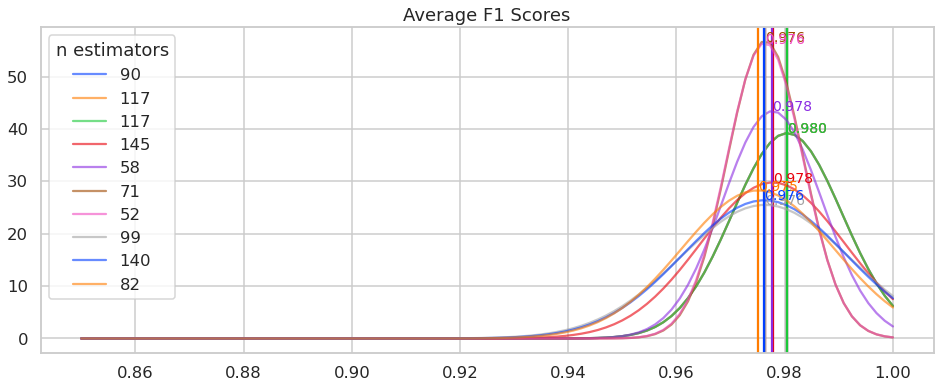

In [9]:
plot_some_tune_results(top_n_df)

In [10]:
%load_ext tensorboard
from tensorboard import notebook 
%tensorboard --logdir "~/ray_results/grid_search"

Reusing TensorBoard on port 6006 (pid 56090), started 0:05:37 ago. (Use '!kill 56090' to kill it.)

In [11]:
ray.shutdown()